In [88]:
import matplotlib.pyplot as plt
import uproot4 as uproot
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import scipy.optimize
from scipy.optimize import curve_fit
import random
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)
from matplotlib.widgets import CheckButtons


In [89]:
#Variables that are loaded directly out of the files.
#There are more here than are needed for these compasisons, they can be removed if memory becomes an issue.
bdt_vars = [
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical",
    "nue_score", 
    "numu_score", 
    "numu_cc_flag",
    "numu_1_score",
    "numu_cc_3_track_length",
    "numu_cc_3_max_length_all",
    "cosmict_2_dQ_dx_front",
    "cosmict_2_dQ_dx_end",
    "cosmict_2_angle_beam",
    "cosmict_2_phi",
    "numu_cc_3_max_length",
    "numu_cc_3_max_muon_length",

    "numu_cc_flag_1",
    "numu_cc_flag_2",
    "numu_cc_flag_3",
    "cosmict_flag",
    
    "numu_cc_1_length",
    "numu_cc_1_direct_length",
    "numu_cc_2_length",
    "numu_cc_2_total_length",

    #"nc_pio_score"
]

bdt_vars_slim = [
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical",
    "nue_score", 
    "numu_score", 
    "numu_cc_flag",
    "numu_1_score",
    "numu_cc_3_track_length",
    "numu_cc_3_max_length_all",
    "cosmict_2_dQ_dx_front",
    "cosmict_2_dQ_dx_end",
    "cosmict_2_angle_beam",
    "cosmict_2_phi",
    "numu_cc_3_max_length",
    "numu_cc_3_max_muon_length",

    "numu_cc_flag_1",
    "numu_cc_flag_2",
    "numu_cc_flag_3",
    "cosmict_flag",
    
    "numu_cc_1_length",
    "numu_cc_1_direct_length",
    "numu_cc_2_length",
    "numu_cc_2_total_length",

    #"nc_pio_score"
]

kine_vars_data = ["kine_particle_type", "kine_energy_particle", "kine_reco_add_energy", "kine_energy_info",
                 "kine_pio_mass",
                    "kine_pio_flag",
                    "kine_pio_vtx_dis",
                    "kine_pio_energy_1",
                    "kine_pio_theta_1",
                    "kine_pio_phi_1",
                    "kine_pio_dis_1",
                    "kine_pio_energy_2",
                    "kine_pio_theta_2",
                    "kine_pio_phi_2",
                    "kine_pio_dis_2",
                    "kine_pio_angle"]
kine_vars = ["kine_particle_type", "kine_energy_particle", "kine_reco_add_energy", "kine_energy_info"]
pf_eval_data_variables = ["reco_muonMomentum","reco_protonMomentum",'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ', 'reco_Nproton', 
                          'reco_Ntrack', 'reco_id', 'reco_pdg','reco_mother','reco_startMomentum', 'reco_endMomentum','reco_startXYZT','reco_endXYZT']


#pf_eval_data_variables = [
#    'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ', 
#    'reco_showervtxX', 'reco_showervtxY', 'reco_showervtxZ', 'reco_showerKE', 
#    'reco_muonvtxX', 'reco_muonvtxY', 'reco_muonvtxZ', 
#    'reco_muonMomentum', 'reco_protonMomentum', 'reco_showerMomentum', 
#    'reco_Nproton', 
#    'reco_Nproton', 
#    'reco_id', 'reco_pdg', 'reco_process', 'reco_mother', 'reco_startXYZT', 'reco_endXYZT', 'reco_startMomentum', 'reco_endMomentum', 'reco_daughters']
eval_data_variables = [
    "run",
    "subrun",
    "event",
    'flash_found', 
    'flash_time', 
    'flash_found_asInt', 'match_found_asInt', 
    'flash_measPe', 'flash_predPe', 
    'match_found', 'match_type', 'match_isFC', 'match_isTgm', 'match_notFC_FV', 'match_notFC_SP','match_notFC_DC', 'match_chargeU', 'match_chargeV', 'match_chargeY', 'match_energyY', 'light_mismatch', 'match_charge', 'match_energy', 
    'stm_eventtype', 'stm_lowenergy', 'stm_LM', 'stm_TGM', 'stm_STM', 'stm_FullDead', 'stm_clusterlength']


eval_data_variables_notbool = [
'flash_time', 
'stm_clusterlength'
 ]

eval_data_variables_energy = [
'match_energyY',
 'match_energy']

eval_data_variables_pe = [
'flash_measPe', 'flash_predPe']

eval_data_variables_charge = [
'match_chargeU', 'match_chargeV', 'match_chargeY','match_charge']

eval_data_variables_cat = [
'match_type','stm_eventtype']

eval_data_variables_bool = [
'flash_found','flash_found_asInt', 'match_found_asInt','match_found','match_isFC',
'match_isTgm', 'match_notFC_FV', 'match_notFC_SP','match_notFC_DC','light_mismatch',
'stm_lowenergy', 'stm_LM', 'stm_TGM', 'stm_STM', 'stm_FullDead']

# Load In Data #

In [90]:
#load in the BNB data
def load_bnb_data(bnb_data_1_filename):
    file = uproot.open(bnb_data_1_filename)

    tree = file["wcpselection"]["T_PFeval"] 
    all_columns = list(tree.keys())
    df_bnb_data = tree.arrays(all_columns, library='pd')

    tree = file["wcpselection"]["T_BDTvars"]    
    all_columns = list(tree.keys())
    if "match_isFC" in all_columns:
        all_columns.remove("match_isFC")
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)

    tree = file["wcpselection"]["T_eval"]
    all_columns = list(tree.keys())
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)

    tree = file["wcpselection"]["T_pot"]
    all_columns = list(tree.keys())
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)

    tree = file["wcpselection"]["T_KINEvars"]
    all_columns = list(tree.keys())
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)

    df_bnb_data = df_bnb_data.loc[:, ~df_bnb_data.columns.duplicated()]

    df_bnb_data["rse_num"] = (df_bnb_data["run"].to_numpy(dtype=float) * 100_000_000_000
                            + df_bnb_data["subrun"].to_numpy(dtype=float) * 1_000_000
                            + df_bnb_data["event"].to_numpy(dtype=float))

    df_bnb_data = df_bnb_data.drop_duplicates(subset=['rse_num']).reset_index()

    #print(df_bnb_data.shape[0])
    #print(df_bnb_data.columns)
    columns_list = df_bnb_data.columns.tolist()
    #print(columns_list)
    df_bnb_data = df_bnb_data.query("evtTimeNS>0")
    return df_bnb_data

df_bnb_mc = load_bnb_data("vg15_52_1.root")

In [108]:
df_bnb_mc_orig = pd.read_pickle("../df_bnb_new_mc_velocity_full.pkl")

# Merge Time

In [109]:
bnb_gap = 18.936

#merge everything into a single peak
#you may have to play around with Shift to get things aligned at 0
def merge_time(df):
    evtTimeNS = df["evtTimeNS_linear"].to_numpy()

    new_times = []

    for i in range(len(evtTimeNS)):
        
        if np.nan_to_num(evtTimeNS[i],nan=-999999,posinf=-999999,neginf=-999999)<=0:
            new_times.append(-9999)
            continue  
            
        gap=bnb_gap
        Shift=5.3188   
        TThelp=0

        TThelp = evtTimeNS[i]-Shift+gap*0.5

        TT_merged=(TThelp-(int((TThelp)/gap))*gap)-gap*0.5
            
        new_times.append(TT_merged)

    df["merge_time"] = new_times

merge_time(df_bnb_mc_orig)

In [110]:
bnb_gap = 18.936

#merge everything into a single peak
#you may have to play around with Shift to get things aligned at 0
def merge_time(df):
    evtTimeNS = df["evtTimeNS_cor"].to_numpy()

    new_times = []

    for i in range(len(evtTimeNS)):
        
        if np.nan_to_num(evtTimeNS[i],nan=-999999,posinf=-999999,neginf=-999999)<=0:
            new_times.append(-9999)
            continue  
            
        gap=bnb_gap
        Shift=-4.0869+0.1295+18.936/2
        TThelp=0

        TThelp = evtTimeNS[i]-Shift+gap*0.5

        TT_merged=(TThelp-(int((TThelp)/gap))*gap)-gap*0.5
            
        new_times.append(TT_merged)

    df["merge_time"] = new_times

merge_time(df_bnb_mc)

# Define Functions

In [111]:
#Used for performing the guassian fit
def gaus(x,a,x0,sigma, offset):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + offset

#helper function to get bin centers
def get_bin_centers(x):
    centers = []
    for i in range(len(x)-1): centers.append( x[i] + (x[i+1]-x[i])/2 )
    return centers

#function to calculate the angle wrt the beam
def get_angle(momentum_0,momentum_1,momentum_2):
    momentum_perp = np.sqrt(momentum_0 * momentum_0 + momentum_1 * momentum_1)
    # defined in https://root.cern/doc/master/TVector3_8cxx_source.html
    theta = np.arctan2(momentum_perp, momentum_2)
    phi = np.arctan2(momentum_0, momentum_1)
    return theta, phi

In [112]:
global_query = "merge_time>-9.42 and merge_time<9.42 and numu_score>0.9"

def get_stats(df, query, x_var, merge_time_col, bins, nbins):
    xvar_full_list =  df.query(query)[x_var].to_numpy()
    weight_list =  np.ones_like(df.query(query)[x_var].to_numpy())
    merge_time =  df.query(query)[merge_time_col].to_numpy()

    data = []
    data_weights = []
    means_CCpi0 = []
    mean_errors_CCpi0 = []
    stds_CCpi0 = []
    std_errors_CCpi0 = []

    for i in range(len(bins)-1):
        data.append([])
        data_weights.append([])   

    for event in tqdm(range(len(xvar_full_list))):
        for i in range(len(bins)-1):
            lo = bins[i]
            hi = 0
            if i==len(bins)-2: hi=1000000
            else: hi = bins[i+1]
            if(xvar_full_list[event]>=lo and xvar_full_list[event]<hi):
                data[i].append(merge_time[event])
                data_weights[i].append(weight_list[event])

        
    for i in range(len(bins)-1):

        y,xbins = np.histogram(data[i],bins=nbins,range=(-9.42, 9.42),weights=data_weights[i])
        
        x = get_bin_centers(xbins)
        means_CCpi0.append(np.sum(x*y)/np.sum(y))
        mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
        stds_CCpi0.append(np.sqrt(np.sum(y*(x-means_CCpi0[-1])**2)/np.sum(y)))
        std_errors_CCpi0.append(np.sqrt(np.sum(y*(x-means_CCpi0[-1])**2)/np.sum(y)**2))
    return means_CCpi0, mean_errors_CCpi0, stds_CCpi0, std_errors_CCpi0
    
#Definitions for some slections and signals that are usefull to examine

em_charge_scale = 0.95

#numucc signal
sig_query = "truth_isCC==1 and truth_nuPdg==14"
#numucc selection
sel_query = "numu_cc_flag>=0 and numu_score > 0.9"
# "NC" selection. mostly just the base for the cut based NCpi0 selection
NC_query = "cosmict_flag==0 and numu_score < 0"
#CC pi0 cut based selection
CCpi0_query = sel_query + ' and ((kine_pio_flag==1 and kine_pio_vtx_dis < 9 ) and kine_pio_energy_1* @em_charge_scale > 40 and kine_pio_energy_2* @em_charge_scale > 25 and kine_pio_dis_1 < 110 and kine_pio_dis_2 < 120 and kine_pio_angle > 0 and kine_pio_angle < 174  and pio_mass > 22 and pio_mass < 300)'
#NC pi0 cut based selection
NCpi0_query = NC_query + ' and ((kine_pio_flag==1 and kine_pio_vtx_dis < 9 or kine_pio_flag==2) and kine_pio_energy_1* @em_charge_scale > 40 and kine_pio_energy_2* @em_charge_scale > 25 and kine_pio_dis_1 < 110 and kine_pio_dis_2 < 120 and kine_pio_angle > 0 and kine_pio_angle < 174  and pio_mass > 22 and pio_mass < 300)'
#CC+NC pi0 cut based selection
pi0_query = '((kine_pio_flag==1 and kine_pio_vtx_dis < 9 or kine_pio_flag==2) and kine_pio_energy_1* @em_charge_scale > 40 and kine_pio_energy_2* @em_charge_scale > 25 and kine_pio_dis_1 < 110 and kine_pio_dis_2 < 120 and kine_pio_angle > 0 and kine_pio_angle < 174  and pio_mass > 22 and pio_mass < 300)'
#NC pi0 BDT based selection
NCpi0_bdt_query = 'nc_pio_score > 1.816 and kine_pio_energy_1 > 0 and kine_pio_energy_2 > 0'

# Processing

In [113]:
kine_pio_energy_1 = []
kine_pio_energy_2 = []

for idx in range(len(df_bnb_mc["kine_pio_energy_1"])):
    if df_bnb_mc["kine_pio_energy_1"].iloc[idx] >= df_bnb_mc["kine_pio_energy_2"].iloc[idx]:
        kine_pio_energy_1.append(df_bnb_mc["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_2.append(df_bnb_mc["kine_pio_energy_2"].iloc[idx])

    else:
        kine_pio_energy_2.append(df_bnb_mc["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_1.append(df_bnb_mc["kine_pio_energy_2"].iloc[idx])
        
df_bnb_mc["kine_pio_energy_1"] = kine_pio_energy_1
df_bnb_mc["kine_pio_energy_2"] = kine_pio_energy_2

kine_pio_energy_1 = []
kine_pio_energy_2 = []

for idx in range(len(df_bnb_mc_orig["kine_pio_energy_1"])):
    if df_bnb_mc_orig["kine_pio_energy_1"].iloc[idx] >= df_bnb_mc_orig["kine_pio_energy_2"].iloc[idx]:
        kine_pio_energy_1.append(df_bnb_mc_orig["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_2.append(df_bnb_mc_orig["kine_pio_energy_2"].iloc[idx])

    else:
        kine_pio_energy_2.append(df_bnb_mc_orig["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_1.append(df_bnb_mc_orig["kine_pio_energy_2"].iloc[idx])
        
df_bnb_mc_orig["kine_pio_energy_1"] = kine_pio_energy_1
df_bnb_mc_orig["kine_pio_energy_2"] = kine_pio_energy_2


def pi0_processing(all_df):
    RAD = 2*np.pi/360
    kine_pio_energy_1 = all_df["kine_pio_energy_1"].to_numpy()
    kine_pio_energy_2 = all_df["kine_pio_energy_2"].to_numpy()
    kine_pio_theta_1 = all_df["kine_pio_theta_1"].to_numpy()
    kine_pio_theta_2 = all_df["kine_pio_theta_2"].to_numpy()
    kine_pio_phi_1 = all_df["kine_pio_phi_1"].to_numpy()
    kine_pio_phi_2 = all_df["kine_pio_phi_2"].to_numpy()
    kine_pio_angle = all_df["kine_pio_angle"].to_numpy()

    pi0_momentum_lst = []
    pi0_momentum_0_lst = []
    pi0_momentum_1_lst = []
    pi0_momentum_2_lst = []
    pi0_phi_lst = []
    pi0_cosphi_lst = []
    pi0_theta_lst = []
    pi0_costheta_lst = []
    pi0_costheta_CM_lst = []
    gamma_1_mom_0_lst = []
    gamma_2_mom_0_lst = []
    gamma_lead_mom_0_lst = []
    gamma_trail_mom_0_lst = []

    for i in tqdm(range(len(kine_pio_energy_1))):
        
        pi0_momentum = -1000
        pi0_mom_0 = -1000
        pi0_mom_1 = -1000
        pi0_mom_2 = -1000
        pi0_costheta = -1000
        pi0_costheta_CM = -1000
        pi0_phi = -1000
        pi0_cosphi = -1000
        pi0_theta = -1000
        pi0_costheta = -1000

        if(kine_pio_energy_1[i] > 0 and kine_pio_energy_2[i] > 0):
            pi0_mass = 135;
            alpha = abs((kine_pio_energy_1[i] - kine_pio_energy_2[i])/(kine_pio_energy_1[i] + kine_pio_energy_2[i]));
            pi0_total_energy = pi0_mass * np.sqrt(2./(1-alpha*alpha)/(1-np.cos(kine_pio_angle[i]*RAD)));
            pi0_momentum = np.sqrt(pi0_total_energy*pi0_total_energy - pi0_mass*pi0_mass);
            pi0_costheta_CM = pi0_total_energy/pi0_momentum * alpha
            
            gamma_1_mom_0 = kine_pio_energy_1[i]*np.cos(kine_pio_phi_1[i]*RAD)*np.sin(kine_pio_theta_1[i]*RAD) 
            gamma_1_mom_1 = kine_pio_energy_1[i]*np.sin(kine_pio_phi_1[i]*RAD)*np.sin(kine_pio_theta_1[i]*RAD) 
            gamma_1_mom_2 = kine_pio_energy_1[i]*np.cos(kine_pio_theta_1[i]*RAD)
            
            gamma_2_mom_0 = kine_pio_energy_2[i]*np.cos(kine_pio_phi_2[i]*RAD)*np.sin(kine_pio_theta_2[i]*RAD) 
            gamma_2_mom_1 = kine_pio_energy_2[i]*np.sin(kine_pio_phi_2[i]*RAD)*np.sin(kine_pio_theta_2[i]*RAD) 
            gamma_2_mom_2 = kine_pio_energy_2[i]*np.cos(kine_pio_theta_2[i]*RAD)

            pi0_mom_0 = gamma_1_mom_0 + gamma_2_mom_0
            pi0_mom_1 = gamma_1_mom_1 + gamma_2_mom_1
            pi0_mom_2 = gamma_1_mom_2 + gamma_2_mom_2
            
            pi0_theta, pi0_phi = get_angle(pi0_mom_0, pi0_mom_1, pi0_mom_2)
            
            #with pio energy
            gamma_1_mom_0_lst.append(gamma_1_mom_0)
            gamma_2_mom_0_lst.append(gamma_2_mom_0)
            
            if abs(gamma_1_mom_0) > abs(gamma_2_mom_0):
                gamma_lead_mom_0 = gamma_1_mom_0
                gamma_trail_mom_0 = gamma_2_mom_0
            else:
                gamma_lead_mom_0 = gamma_2_mom_0
                gamma_trail_mom_0 = gamma_1_mom_0
            
            #with bigger x-momentum
            gamma_lead_mom_0_lst.append(gamma_lead_mom_0)
            gamma_trail_mom_0_lst.append(gamma_trail_mom_0)
        else:
            gamma_1_mom_0_lst.append(-1000)
            gamma_2_mom_0_lst.append(-1000)
            gamma_lead_mom_0_lst.append(-1000)
            gamma_trail_mom_0_lst.append(-1000)
        
        pi0_momentum_lst.append(pi0_momentum)
        pi0_momentum_0_lst.append(pi0_mom_0)
        pi0_momentum_1_lst.append(pi0_mom_1)
        pi0_momentum_2_lst.append(pi0_mom_2)
        pi0_phi_lst.append(pi0_phi)
        if pi0_phi != -1000: pi0_cosphi_lst.append(np.cos(pi0_phi))
        else: pi0_cosphi_lst.append(-1000)
        pi0_theta_lst.append(pi0_theta)
        if pi0_theta != -1000: pi0_costheta_lst.append(np.cos(pi0_theta))
        else: pi0_costheta_lst.append(-1000)
        pi0_costheta_CM_lst.append(pi0_costheta_CM)

    all_df["reco_pi0_mom"] = pi0_momentum_lst
    all_df["reco_pi0_mom_0"] = pi0_momentum_0_lst
    all_df["reco_pi0_mom_1"] = pi0_momentum_1_lst
    all_df["reco_pi0_mom_2"] = pi0_momentum_2_lst
    all_df["reco_pi0_phi"] = pi0_phi_lst
    all_df["reco_pi0_cosphi"] = pi0_cosphi_lst
    all_df["reco_pi0_theta"] = pi0_theta_lst
    all_df["reco_pi0_costheta"] = pi0_costheta_lst
    all_df["reco_pi0_costheta_CM"] = pi0_costheta_CM_lst   
    all_df["gamma_1_mom_0"] = gamma_1_mom_0_lst
    all_df["gamma_2_mom_0"] = gamma_2_mom_0_lst
    all_df["gamma_lead_mom_0"] = gamma_lead_mom_0_lst
    all_df["gamma_trail_mom_0"] = gamma_trail_mom_0_lst
    
pi0_processing(df_bnb_mc)
pi0_processing(df_bnb_mc_orig)

100%|██████████| 30032/30032 [00:00<00:00, 110511.99it/s]


In [115]:
def scaling_recalc(data_run4b_super_df):
    
    em_charge_scale = 0.95
    data_run4b_super_df["pio_mass"] = data_run4b_super_df['kine_pio_mass'].to_numpy()* em_charge_scale
    data_run4b_super_df["em_charge_scale"] = np.ones_like(data_run4b_super_df['kine_pio_mass'].to_numpy())* em_charge_scale
    
    #Get the reconstructed neutrino energy, for data we need to apply a scaling to the shower energy
    corrected_kine_reco_Enus = []
    energy_info_lists = data_run4b_super_df["kine_energy_info"].to_numpy()
    energy_lists = data_run4b_super_df["kine_energy_particle"].to_numpy()
    pdg_lists = data_run4b_super_df["kine_particle_type"].to_numpy()
    add_energies = data_run4b_super_df["kine_reco_add_energy"].to_numpy()
    for i in tqdm(range(data_run4b_super_df.shape[0])):
        corrected_kine_reco_Enu = 0.
        energy_list = energy_lists[i]
        pdg_list = pdg_lists[i]
        energy_info_list = energy_info_lists[i]
        for j in range(len(energy_list)):
            if energy_info_list[j] == 2 and pdg_list[j] == 11:
                corrected_kine_reco_Enu += em_charge_scale * energy_list[j]
            else:
                corrected_kine_reco_Enu += energy_list[j]
        corrected_kine_reco_Enu += add_energies[i]
        
        corrected_kine_reco_Enus.append(corrected_kine_reco_Enu) 

    data_run4b_super_df["kine_reco_Enu"] = corrected_kine_reco_Enus

    

    #get the muon and leading proton info out of the pfeval tree
    mu = data_run4b_super_df["reco_muonMomentum"].to_numpy()
    
    '''mu0 = data_run4b_super_df["reco_muonMomentum[0]"].to_numpy()
    mu1 = data_run4b_super_df["reco_muonMomentum[1]"].to_numpy()
    mu2 = data_run4b_super_df["reco_muonMomentum[2]"].to_numpy()
    mu3 = data_run4b_super_df["reco_muonMomentum[3]"].to_numpy()

    p0 = data_run4b_super_df["reco_protonMomentum[0]"].to_numpy()
    p1 = data_run4b_super_df["reco_protonMomentum[1]"].to_numpy()
    p2 = data_run4b_super_df["reco_protonMomentum[2]"].to_numpy()
    p3 = data_run4b_super_df["reco_protonMomentum[3]"].to_numpy()'''

    
    p = data_run4b_super_df["reco_protonMomentum"].to_numpy()

    kine_reco_Enu = data_run4b_super_df["kine_reco_Enu"].to_numpy()

    mu_thetas = []
    mu_phis = []
    mu_costhetas = []
    mu_cosphis = []
    reco_Emuon = []

    p_thetas = []
    p_phis = []
    p_costhetas = []
    p_cosphis = []
    reco_Eproton = []

    Ehadron = []

    print(len(mu))

    for i in range(len(mu)):
        if(mu[i][3]<=0): 
            mu_theta = np.nan
            mu_phi = np.nan
            Ehadron.append(kine_reco_Enu[i])
        else: 
            mu_theta, mu_phi = get_angle(mu[i][0], mu[i][1], mu[i][2])
            Ehadron.append(kine_reco_Enu[i]-mu[i][3]*1000)
        mu_thetas.append(mu_theta)
        mu_phis.append(mu_phi)
        mu_costhetas.append(np.cos(mu_theta))
        mu_cosphis.append(np.cos(mu_phi))
        reco_Emuon.append(mu[i][3]*1000)
        
        if(p[i][3]<=0): 
            p_theta = np.nan
            p_phi = np.nan
            reco_Eproton.append(0)
            
        else: 
            p_theta, p_phi = get_angle(p[i][0], p[i][1], p[i][2])
            reco_Eproton.append(p[i][3]*1000-938.27)
        p_thetas.append(p_theta)
        p_phis.append(p_phi)
        p_costhetas.append(np.cos(p_theta))
        p_cosphis.append(np.cos(p_phi))
        
        
        
        
    print(len(data_run4b_super_df))
    print(len(mu_thetas), len(mu_phis), len(mu_costhetas), len(reco_Emuon))

    data_run4b_super_df["reco_muon_theta"] = mu_thetas
    data_run4b_super_df["reco_muon_phi"] = mu_phis
    data_run4b_super_df["reco_muon_costheta"] = mu_costhetas
    data_run4b_super_df["reco_muon_cosphi"] = mu_cosphis 
    data_run4b_super_df["reco_Emuon"] = reco_Emuon

    data_run4b_super_df["reco_proton_theta"] = p_thetas
    data_run4b_super_df["reco_proton_phi"] = p_phis
    data_run4b_super_df["reco_proton_costheta"] = p_costhetas
    data_run4b_super_df["reco_proton_cosphi"] = p_cosphis 
    data_run4b_super_df["reco_Eproton"] = reco_Eproton

    data_run4b_super_df["Ehadron"] = Ehadron

scaling_recalc(df_bnb_mc)
scaling_recalc(df_bnb_mc_orig)

100%|██████████| 24159/24159 [00:00<00:00, 504085.16it/s]


24159
24159
24159 24159 24159 24159


100%|██████████| 30032/30032 [00:00<00:00, 551452.53it/s]


30032
30032
30032 30032 30032 30032


In [116]:
mu = df_bnb_mc["reco_muonMomentum"]

p = df_bnb_mc["reco_protonMomentum"]

kine_reco_Enu = df_bnb_mc["kine_reco_Enu"].to_numpy()

mu_thetas = []
mu_phis = []
mu_costhetas = []
mu_cosphis = []
reco_Emuon = []

p_thetas = []
p_phis = []
p_costhetas = []
p_cosphis = []
reco_Eproton = []

Ehadron = []

for i in range(len(mu)):
    mu_val = mu.iloc[i]
    p_val = p.iloc[i]
    if isinstance(mu_val, (list, np.ndarray)) and len(mu_val) > 3 and mu_val[3] > 0:
        mu_theta, mu_phi = get_angle(mu_val[0], mu_val[1], mu_val[2])
        Ehadron.append(kine_reco_Enu[i] - mu_val[3]*1000)
    else:
        mu_theta = np.nan
        mu_phi = np.nan
        Ehadron.append(kine_reco_Enu[i])
    mu_thetas.append(mu_theta)
    mu_phis.append(mu_phi)
    mu_costhetas.append(np.cos(mu_theta))
    mu_cosphis.append(np.cos(mu_phi))
    reco_Emuon.append(mu_val[3]*1000 if isinstance(mu_val, (list, np.ndarray)) and len(mu_val) > 3 else np.nan)

    if isinstance(p_val, (list, np.ndarray)) and len(p_val) > 3 and p_val[3] > 0:
        p_theta, p_phi = get_angle(p_val[0], p_val[1], p_val[2])
        reco_Eproton.append(p_val[3]*1000)
    else:
        p_theta = np.nan
        p_phi = np.nan
        reco_Eproton.append(0)
    p_thetas.append(p_theta)
    p_phis.append(p_phi)
    p_costhetas.append(np.cos(p_theta))
    p_cosphis.append(np.cos(p_phi))
    
    
    
df_bnb_mc["reco_muon_theta"] = mu_thetas
df_bnb_mc["reco_muon_phi"] = mu_phis
df_bnb_mc["reco_muon_costheta"] = mu_costhetas
df_bnb_mc["reco_muon_cosphi"] = mu_cosphis 
df_bnb_mc["reco_Emuon"] = reco_Emuon

df_bnb_mc["reco_shower_theta"] = p_thetas
df_bnb_mc["reco_shower_phi"] = p_phis
df_bnb_mc["reco_shower_costheta"] = p_costhetas
df_bnb_mc["reco_shower_cosphi"] = p_cosphis 
df_bnb_mc["reco_showerMomentum"] = reco_Eproton

df_bnb_mc["Ehadron"] = Ehadron

In [117]:
mu = df_bnb_mc_orig["reco_muonMomentum"]

p = df_bnb_mc_orig["reco_protonMomentum"]

kine_reco_Enu = df_bnb_mc_orig["kine_reco_Enu"].to_numpy()

mu_thetas = []
mu_phis = []
mu_costhetas = []
mu_cosphis = []
reco_Emuon = []

p_thetas = []
p_phis = []
p_costhetas = []
p_cosphis = []
reco_Eproton = []

Ehadron = []

for i in range(len(mu)):
    mu_val = mu.iloc[i]
    p_val = p.iloc[i]
    if isinstance(mu_val, (list, np.ndarray)) and len(mu_val) > 3 and mu_val[3] > 0:
        mu_theta, mu_phi = get_angle(mu_val[0], mu_val[1], mu_val[2])
        Ehadron.append(kine_reco_Enu[i] - mu_val[3]*1000)
    else:
        mu_theta = np.nan
        mu_phi = np.nan
        Ehadron.append(kine_reco_Enu[i])
    mu_thetas.append(mu_theta)
    mu_phis.append(mu_phi)
    mu_costhetas.append(np.cos(mu_theta))
    mu_cosphis.append(np.cos(mu_phi))
    reco_Emuon.append(mu_val[3]*1000 if isinstance(mu_val, (list, np.ndarray)) and len(mu_val) > 3 else np.nan)

    if isinstance(p_val, (list, np.ndarray)) and len(p_val) > 3 and p_val[3] > 0:
        p_theta, p_phi = get_angle(p_val[0], p_val[1], p_val[2])
        reco_Eproton.append(p_val[3]*1000)
    else:
        p_theta = np.nan
        p_phi = np.nan
        reco_Eproton.append(0)
    p_thetas.append(p_theta)
    p_phis.append(p_phi)
    p_costhetas.append(np.cos(p_theta))
    p_cosphis.append(np.cos(p_phi))
    
    
    
df_bnb_mc_orig["reco_muon_theta"] = mu_thetas
df_bnb_mc_orig["reco_muon_phi"] = mu_phis
df_bnb_mc_orig["reco_muon_costheta"] = mu_costhetas
df_bnb_mc_orig["reco_muon_cosphi"] = mu_cosphis 
df_bnb_mc_orig["reco_Emuon"] = reco_Emuon

df_bnb_mc_orig["reco_shower_theta"] = p_thetas
df_bnb_mc_orig["reco_shower_phi"] = p_phis
df_bnb_mc_orig["reco_shower_costheta"] = p_costhetas
df_bnb_mc_orig["reco_shower_cosphi"] = p_cosphis 
df_bnb_mc_orig["reco_showerMomentum"] = reco_Eproton

df_bnb_mc_orig["Ehadron"] = Ehadron

In [118]:
def pio_processing(df_bnb_mc):
    kine_pio_theta_lead = []
    kine_pio_theta_trail = []
    kine_pio_phi_lead = []
    kine_pio_phi_trail = []
    kine_pio_dis_lead = []
    kine_pio_dis_trail = []

    for idx in range(len(df_bnb_mc["kine_pio_energy_1"])):
        if df_bnb_mc["kine_pio_energy_1"].iloc[idx] >= df_bnb_mc["kine_pio_energy_2"].iloc[idx]:
            kine_pio_theta_lead.append(df_bnb_mc["kine_pio_theta_1"].iloc[idx])
            kine_pio_theta_trail.append(df_bnb_mc["kine_pio_theta_2"].iloc[idx])
            kine_pio_phi_lead.append(df_bnb_mc["kine_pio_phi_1"].iloc[idx])
            kine_pio_phi_trail.append(df_bnb_mc["kine_pio_phi_2"].iloc[idx])
            kine_pio_dis_lead.append(df_bnb_mc["kine_pio_dis_1"].iloc[idx])
            kine_pio_dis_trail.append(df_bnb_mc["kine_pio_dis_2"].iloc[idx])
        else:
            kine_pio_theta_lead.append(df_bnb_mc["kine_pio_theta_2"].iloc[idx])
            kine_pio_theta_trail.append(df_bnb_mc["kine_pio_theta_1"].iloc[idx])
            kine_pio_phi_lead.append(df_bnb_mc["kine_pio_phi_2"].iloc[idx])
            kine_pio_phi_trail.append(df_bnb_mc["kine_pio_phi_1"].iloc[idx])
            kine_pio_dis_lead.append(df_bnb_mc["kine_pio_dis_2"].iloc[idx])
            kine_pio_dis_trail.append(df_bnb_mc["kine_pio_dis_1"].iloc[idx])

    df_bnb_mc["kine_pio_theta_lead"] = kine_pio_theta_lead
    df_bnb_mc["kine_pio_theta_trail"] = kine_pio_theta_trail
    df_bnb_mc["kine_pio_phi_lead"] = kine_pio_phi_lead
    df_bnb_mc["kine_pio_phi_trail"] = kine_pio_phi_trail
    df_bnb_mc["kine_pio_dis_lead"] = kine_pio_dis_lead
    df_bnb_mc["kine_pio_dis_trail"] = kine_pio_dis_trail

    kine_pio_theta_lead = []
    kine_pio_theta_trail = []
    kine_pio_phi_lead = []
    kine_pio_phi_trail = []
    kine_pio_dis_lead = []
    kine_pio_dis_trail = []

    for idx in range(len(df_bnb_mc["kine_pio_energy_1"])):
        if df_bnb_mc["kine_pio_energy_1"].iloc[idx] >= df_bnb_mc["kine_pio_energy_2"].iloc[idx]:
            kine_pio_theta_lead.append(df_bnb_mc["kine_pio_theta_1"].iloc[idx])
            kine_pio_theta_trail.append(df_bnb_mc["kine_pio_theta_2"].iloc[idx])
            kine_pio_phi_lead.append(df_bnb_mc["kine_pio_phi_1"].iloc[idx])
            kine_pio_phi_trail.append(df_bnb_mc["kine_pio_phi_2"].iloc[idx])
            kine_pio_dis_lead.append(df_bnb_mc["kine_pio_dis_1"].iloc[idx])
            kine_pio_dis_trail.append(df_bnb_mc["kine_pio_dis_2"].iloc[idx])
        else:
            kine_pio_theta_lead.append(df_bnb_mc["kine_pio_theta_2"].iloc[idx])
            kine_pio_theta_trail.append(df_bnb_mc["kine_pio_theta_1"].iloc[idx])
            kine_pio_phi_lead.append(df_bnb_mc["kine_pio_phi_2"].iloc[idx])
            kine_pio_phi_trail.append(df_bnb_mc["kine_pio_phi_1"].iloc[idx])
            kine_pio_dis_lead.append(df_bnb_mc["kine_pio_dis_2"].iloc[idx])
            kine_pio_dis_trail.append(df_bnb_mc["kine_pio_dis_1"].iloc[idx])

    df_bnb_mc["kine_pio_theta_lead"] = kine_pio_theta_lead
    df_bnb_mc["kine_pio_theta_trail"] = kine_pio_theta_trail
    df_bnb_mc["kine_pio_phi_lead"] = kine_pio_phi_lead
    df_bnb_mc["kine_pio_phi_trail"] = kine_pio_phi_trail
    df_bnb_mc["kine_pio_dis_lead"] = kine_pio_dis_lead
    df_bnb_mc["kine_pio_dis_trail"] = kine_pio_dis_trail


pio_processing(df_bnb_mc)
pio_processing(df_bnb_mc_orig)
    

# Plotting

numuCC: Gaussian      mean: 0.0288   std: 2.6708   C: 0.0046
CCpi0: Gaussian      mean: 0.2655   std: 2.4376   C: 0.0037
NCpi0: Gaussian      mean: 0.0164   std: 2.5784   C: 0.0074
loose nueCC: Gaussian      mean: 0.8438   std: 2.2652   C: 0.0061


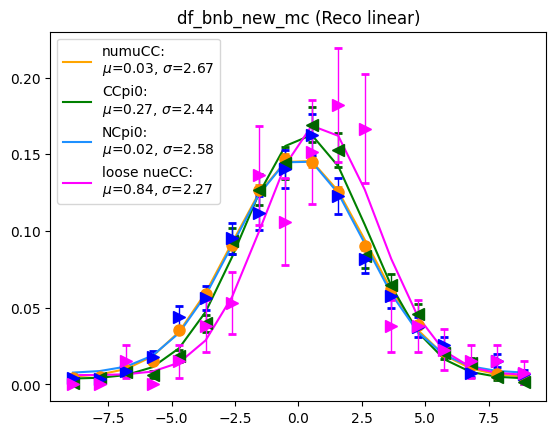

numuCC: Gaussian      mean: 0.0039   std: 2.6106   C: 0.0051
CCpi0: Gaussian      mean: 0.1261   std: 2.5137   C: 0.0026
NCpi0: Gaussian      mean: -0.141   std: 2.7782   C: 0.0074
loose nueCC: Gaussian      mean: 0.705   std: 3.06   C: -0.0025


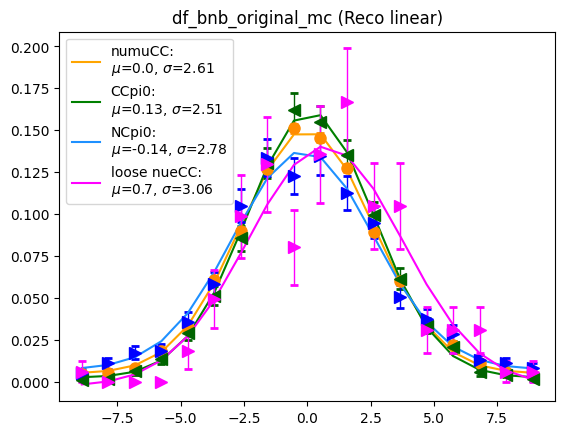

In [119]:
def plot_time_distribution(df, time_col = "merge_time", label=""):
    nbins = 18

    # Helper for query string
    time_query = f"{time_col}>-9.42 and {time_col}<9.42"

    data_numuCC = df.query(time_query).query("numu_score>0.9")[time_col].to_numpy()
    norm1 = len(data_numuCC)
    y, xbins = np.histogram(data_numuCC, bins=nbins, range=(-9.42, 9.42))
    x1 = get_bin_centers(xbins)
    popt, pcov = curve_fit(gaus, x1, y / norm1)
    print("numuCC: Gaussian      mean:", round(popt[1], 4), "  std:", round(popt[2], 4), "  C:", round(popt[3], 4))

    data_CCpi0 = df.query(time_query).query(CCpi0_query)[time_col].to_numpy()
    norm2 = len(data_CCpi0)
    y2, xbins = np.histogram(data_CCpi0, bins=nbins, range=(-9.42, 9.42))
    x2 = get_bin_centers(xbins)
    popt2, pcov2 = curve_fit(gaus, x2, y2 / norm2)
    print("CCpi0: Gaussian      mean:", round(popt2[1], 4), "  std:", round(popt2[2], 4), "  C:", round(popt2[3], 4))

    data_NCpi0 = df.query(time_query).query(NCpi0_query)[time_col].to_numpy()
    norm3 = len(data_NCpi0)
    y3, xbins = np.histogram(data_NCpi0, bins=nbins, range=(-9.42, 9.42))
    x3 = get_bin_centers(xbins)
    popt3, pcov3 = curve_fit(gaus, x3, y3 / norm3)
    print("NCpi0: Gaussian      mean:", round(popt3[1], 4), "  std:", round(popt3[2], 4), "  C:", round(popt3[3], 4))

    data_nueCC = df.query(time_query).query("nue_score>4")[time_col].to_numpy()
    norm4 = len(data_nueCC)
    y4, xbins = np.histogram(data_nueCC, bins=nbins, range=(-9.42, 9.42))
    x4 = get_bin_centers(xbins)
    popt4, pcov4 = curve_fit(gaus, x4, y4 / norm4)
    print("loose nueCC: Gaussian      mean:", round(popt4[1], 4), "  std:", round(popt4[2], 4), "  C:", round(popt4[3], 4))

    if(time_col == "merge_time_linear_sps"):
        label = label + " (spacepoints)"
    else:
        label = label + " (Reco linear)"

    plt.figure()
    plt.title(label)
    plt.errorbar(x1, y / norm1, yerr=np.sqrt(y) / norm1, ms=8, lw=1, fmt='o', ecolor='darkorange', color='darkorange', capsize=3, capthick=2)
    plt.plot(x1, gaus(x1, *popt), color='orange', label='numuCC:' + '\n' + f"$\mu$={round(popt[1],2)}, $\\sigma$={round(abs(popt[2]),2)}")

    plt.errorbar(x2, y2 / norm2, yerr=np.sqrt(y2) / norm2, ms=8, lw=1, fmt='<', ecolor='darkgreen', color='darkgreen', capsize=3, capthick=2)
    plt.plot(x2, gaus(x2, *popt2), color='green', label='CCpi0:' + '\n' + f"$\mu$={round(popt2[1],2)}, $\\sigma$={round(abs(popt2[2]),2)}")

    plt.errorbar(x3, y3 / norm3, yerr=np.sqrt(y3) / norm3, ms=8, lw=1, fmt='>', ecolor='blue', color='blue', capsize=3, capthick=2)
    plt.plot(x3, gaus(x3, *popt3), color='dodgerblue', label='NCpi0:' + '\n' + f"$\mu$={round(popt3[1],2)}, $\\sigma$={round(abs(popt3[2]),2)}")


    plt.errorbar(x4,y4/norm4,yerr=np.sqrt(y4)/norm4,ms=8, lw=1,fmt='>',ecolor = 'magenta',color='magenta', capsize=3, capthick=2)
    plt.plot(x4,gaus(x4,*popt4),color='magenta',label='loose nueCC:'+'\n'+f"$\mu$={round(popt4[1],2)}, $\\sigma$={round(abs(popt4[2]),2)}")

    '''shift_text = f"Shifts:\nCCpi0 = {shift_ccpi0}\nNCpi0 = {shift_ncpi0}\nNue = {shift_nue}"
    plt.gcf().text(1.1, 0.2, shift_text, fontsize=12, va='center', ha='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
    '''

    plt.legend()
    plt.show()

plot_time_distribution(df_bnb_mc, time_col="merge_time", label="df_bnb_new_mc")
plot_time_distribution(df_bnb_mc_orig, time_col="merge_time", label="df_bnb_original_mc")

In [120]:
def plot_merge_time_spread(x_var, bins, nbins=18, df_flag = "new", merge_selection="merge_time"):
    selections = ["numu_score > 0.9", CCpi0_query, NCpi0_query, "nue_score > 4"]
    if(df_flag == "new"):
        df = df_bnb_mc
    if(df_flag == "orig"):
        df = df_bnb_mc_orig
    if(df_flag == "both"):
        plot_merge_time_spread(x_var, bins, nbins, "new", merge_selection)
        plot_merge_time_spread(x_var, bins, nbins, "orig", merge_selection)
        return  
    for selection in selections:
        selection_query = selection
        means_data, mean_errors_data, stds_data, std_errors_data = get_stats(
            df, selection_query, x_var, merge_selection, bins, nbins
        )
        label_select = "CCpi0"
        marker_select = "o"
        color_data = "blue"
        color_mc = "cyan"
        if selection_query == NCpi0_query:
            label_select = "NCpi0"
            marker_select = "s"
            color_data = "red"
            color_mc = "orange"
        if selection_query == "numu_score > 0.9":
            label_select = "NumuCC"
            marker_select = "D"
            color_data = "green"
            color_mc = "lime"
        if selection_query == "nue_score > 4":
            label_select = "NueCC"
            marker_select = "v"
            color_data = "purple"
            color_mc = "violet"
        bin_centers = get_bin_centers(bins)
        if(df_flag == "new"):
            plt.title("BNB MC New: " + x_var)
        elif(df_flag == "orig"):
            plt.title("BNB MC Original: " + x_var)
        if(df_flag == "new"):
            plt.errorbar(bin_centers, means_data, yerr=mean_errors_data, lw=0, ms=5, marker = marker_select, elinewidth=1, label="new " + label_select, color = color_data)
        elif(df_flag == "orig"):
            plt.errorbar(bin_centers, means_data, yerr=mean_errors_data, lw=0, ms=5, marker = marker_select, elinewidth=1, label="original " + label_select, color = color_data)
        plt.xlabel(x_var)
        plt.ylabel("Mean Merged Time (ns)")
        plt.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5) 
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# characterize variables

100%|██████████| 132/132 [00:00<?, ?it/s]


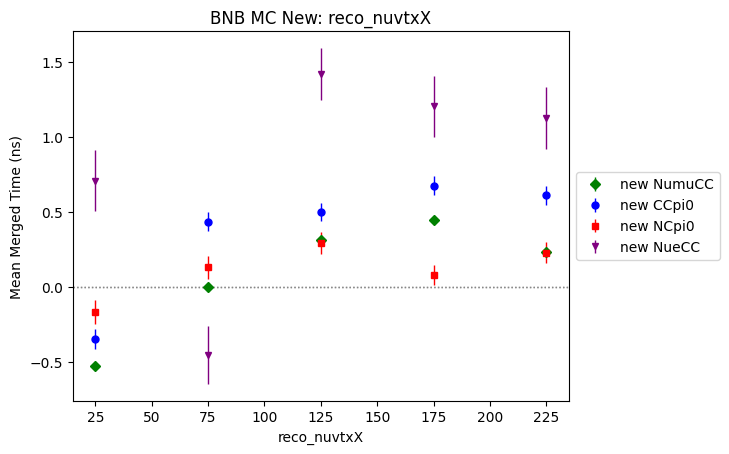

100%|██████████| 162/162 [00:00<00:00, 39483.83it/s]


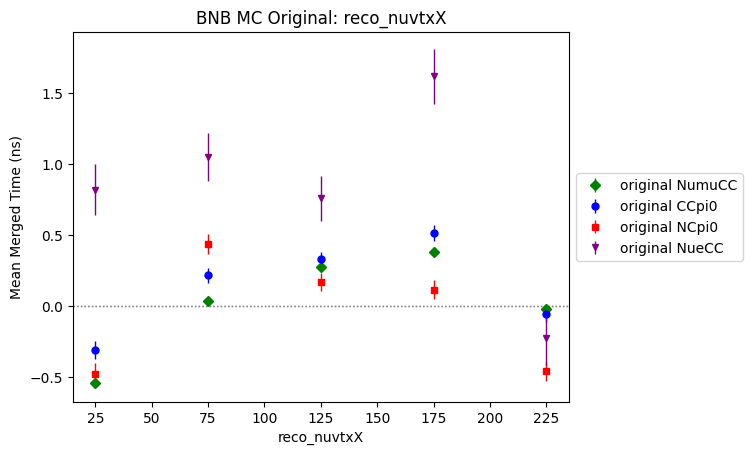

100%|██████████| 132/132 [00:00<?, ?it/s]


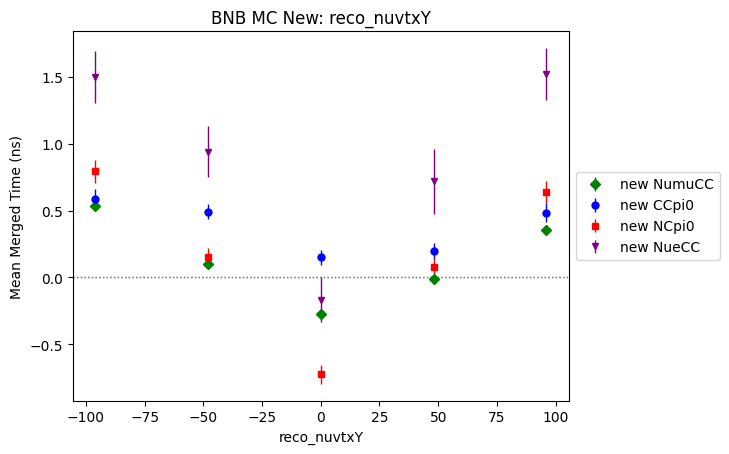

100%|██████████| 162/162 [00:00<00:00, 106102.01it/s]


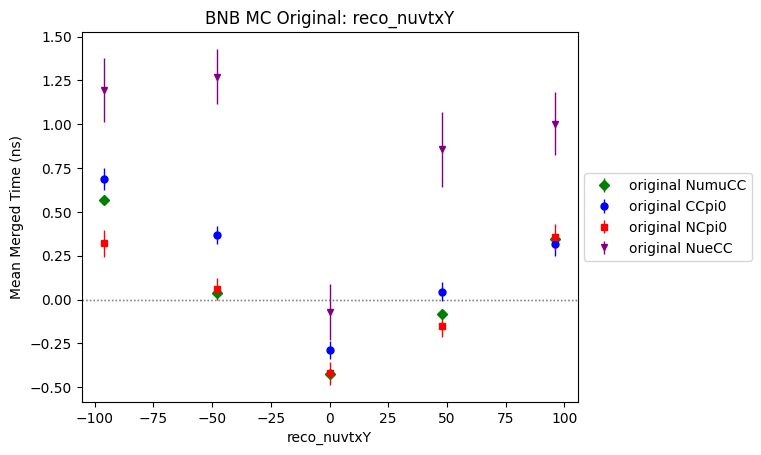

100%|██████████| 132/132 [00:00<00:00, 15720.60it/s]


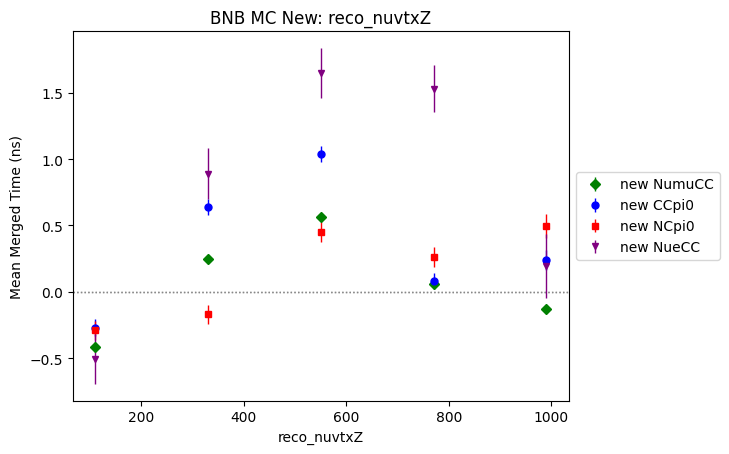

100%|██████████| 162/162 [00:00<?, ?it/s]


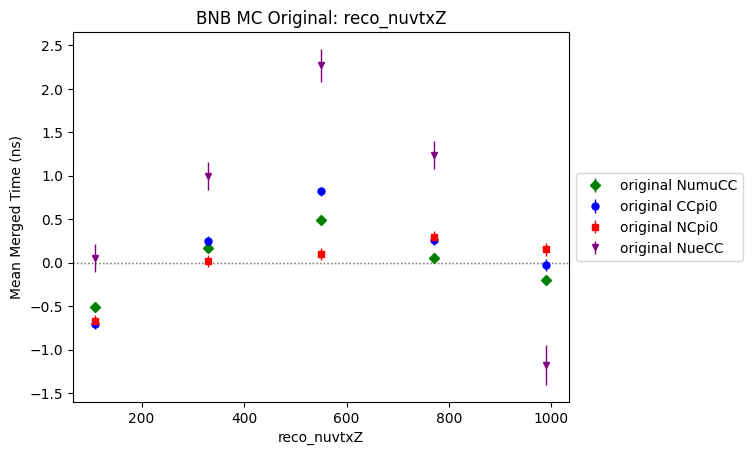

100%|██████████| 132/132 [00:00<00:00, 29561.01it/s]


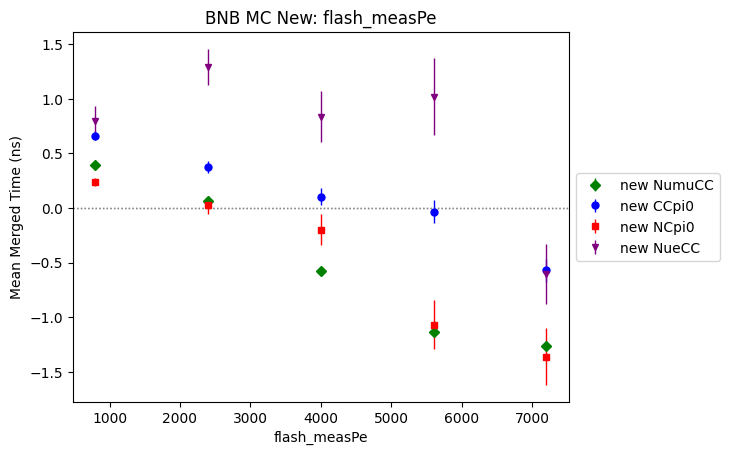

100%|██████████| 162/162 [00:00<?, ?it/s]


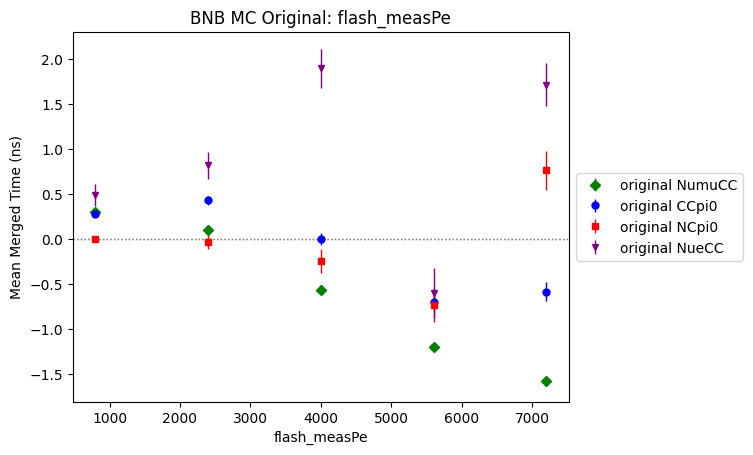

100%|██████████| 132/132 [00:00<?, ?it/s]


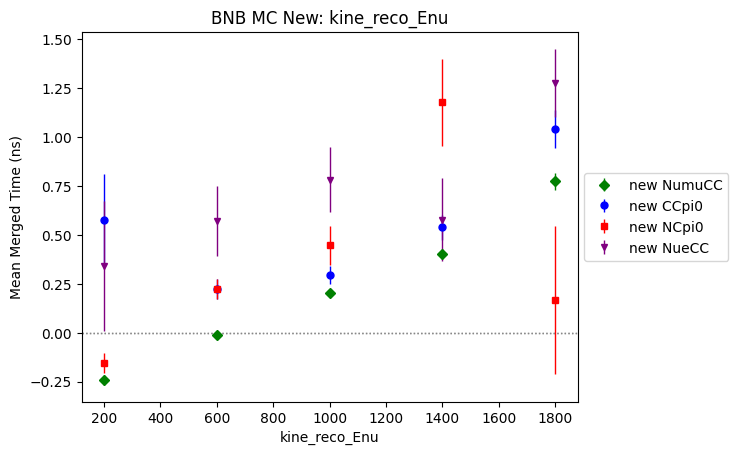

100%|██████████| 162/162 [00:00<00:00, 62520.91it/s]


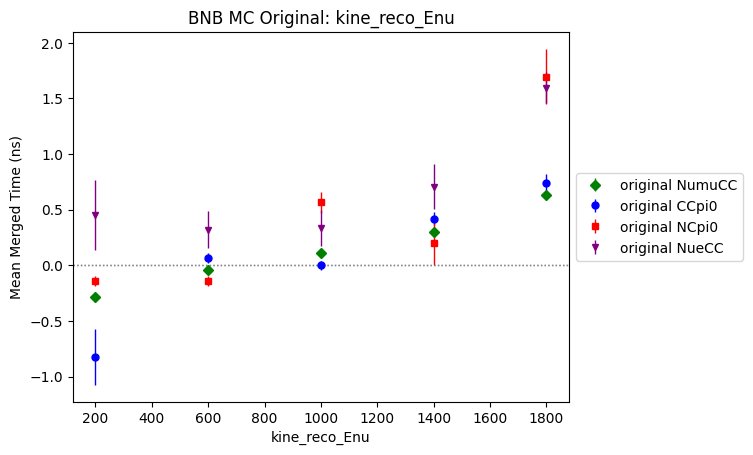

100%|██████████| 132/132 [00:00<?, ?it/s]


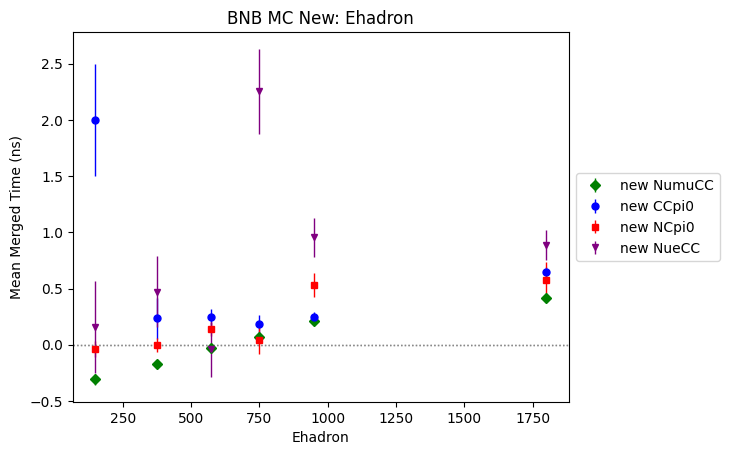

100%|██████████| 162/162 [00:00<?, ?it/s]


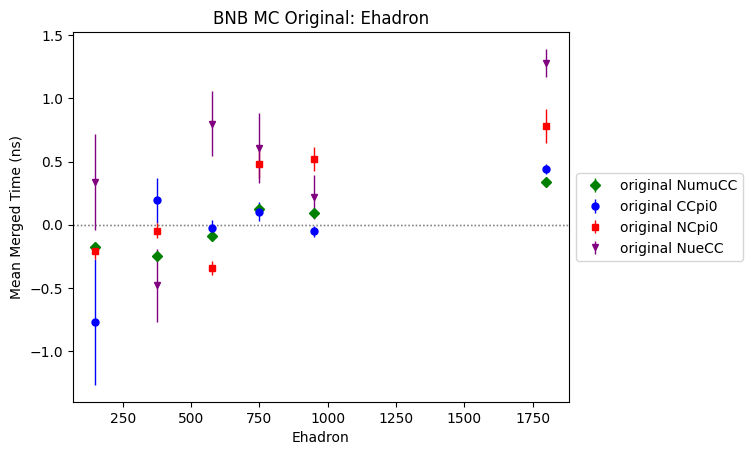

100%|██████████| 132/132 [00:00<00:00, 75428.90it/s]


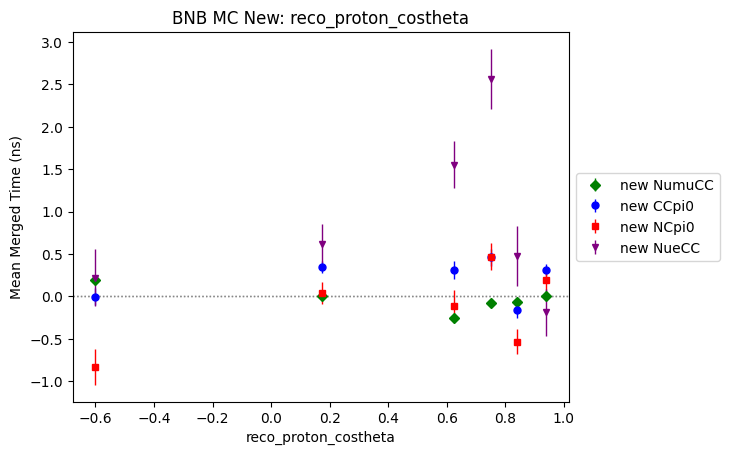

100%|██████████| 162/162 [00:00<?, ?it/s]


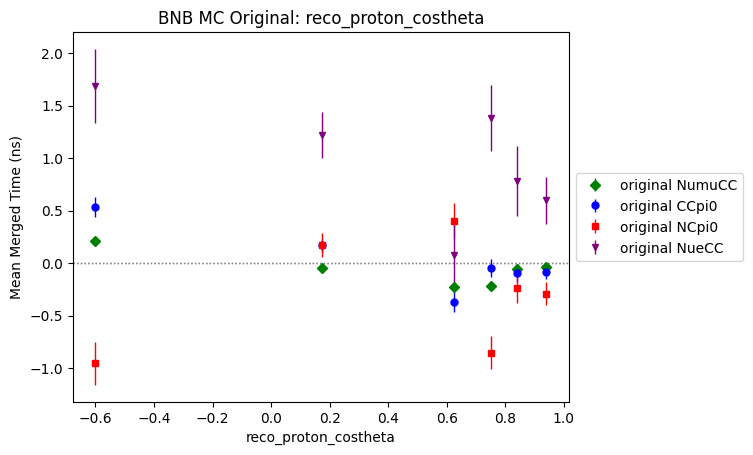

100%|██████████| 132/132 [00:00<?, ?it/s]


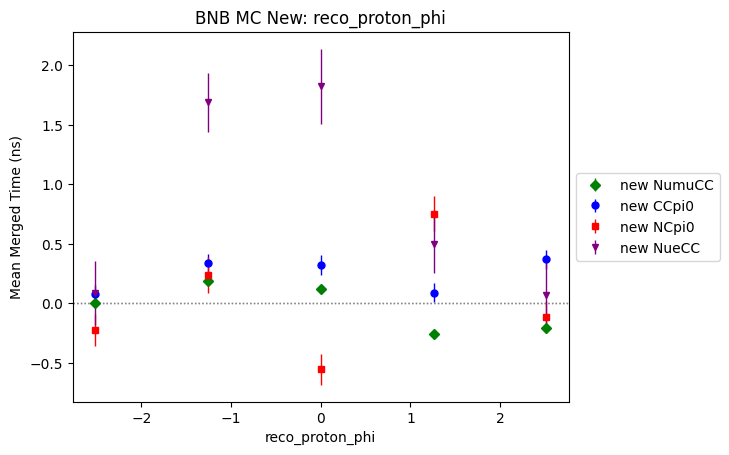

100%|██████████| 162/162 [00:00<?, ?it/s]


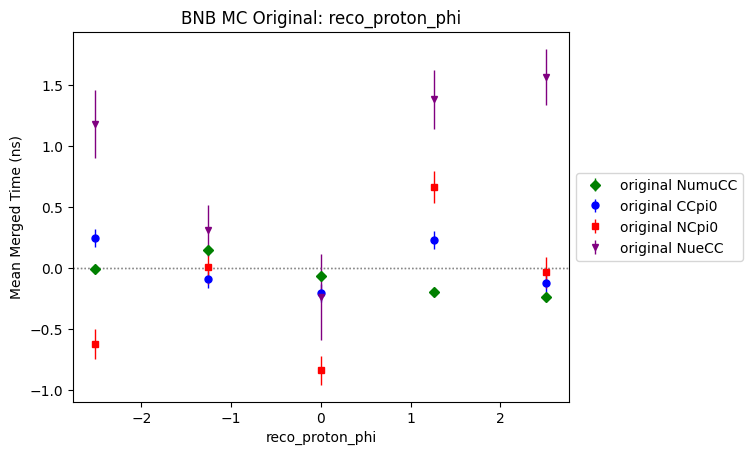

100%|██████████| 132/132 [00:00<?, ?it/s]


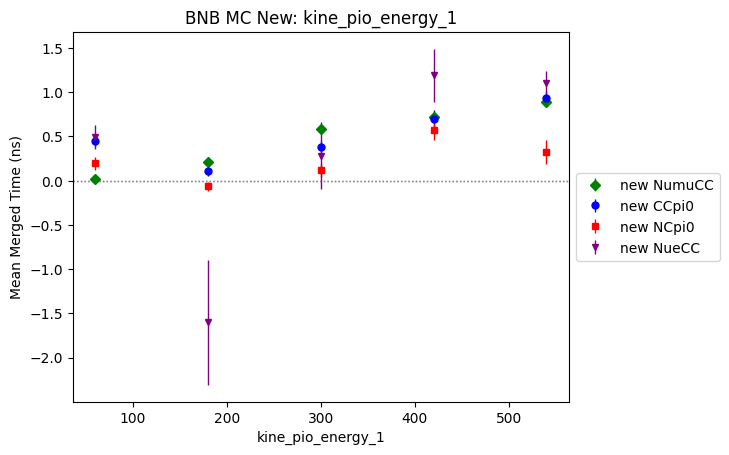

100%|██████████| 162/162 [00:00<?, ?it/s]


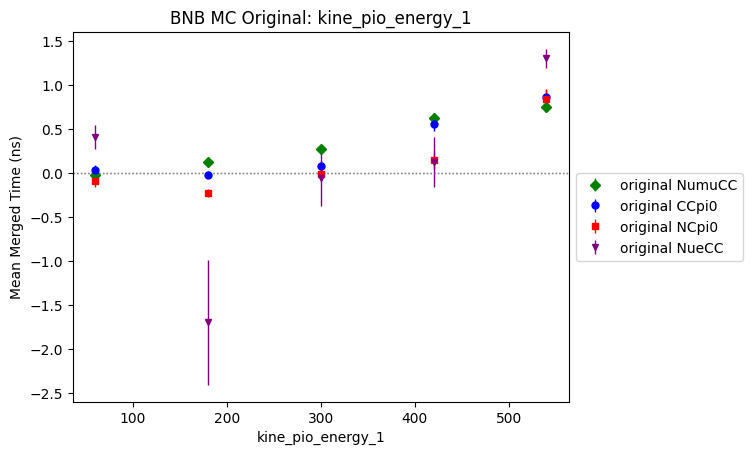

100%|██████████| 908/908 [00:00<00:00, 155123.13it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 132/132 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


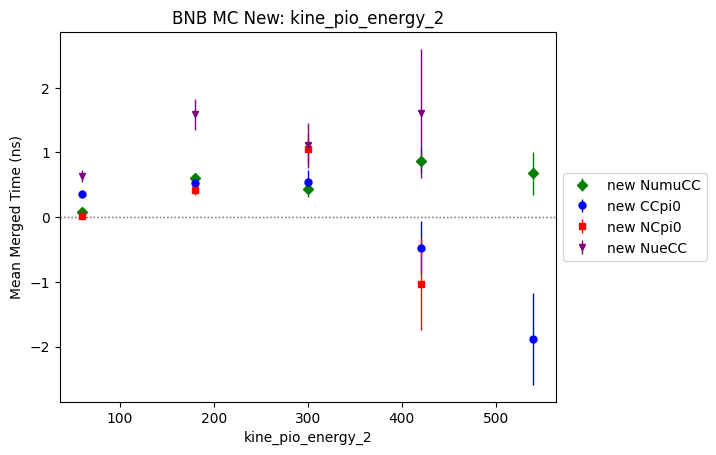

100%|██████████| 1577/1577 [00:00<00:00, 149505.39it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 162/162 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


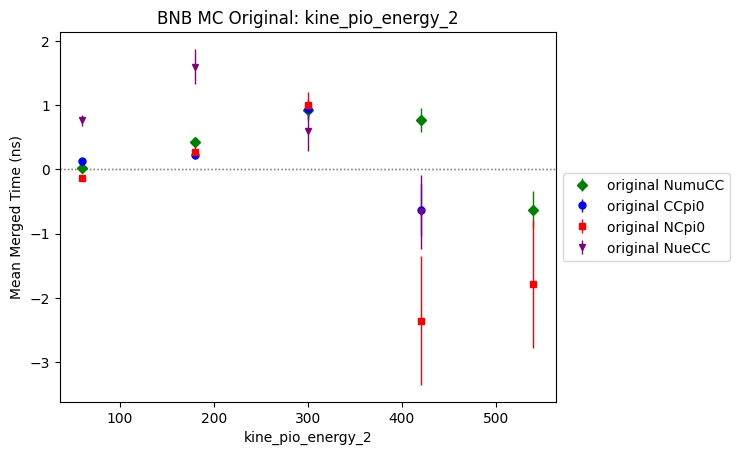

100%|██████████| 132/132 [00:00<?, ?it/s]


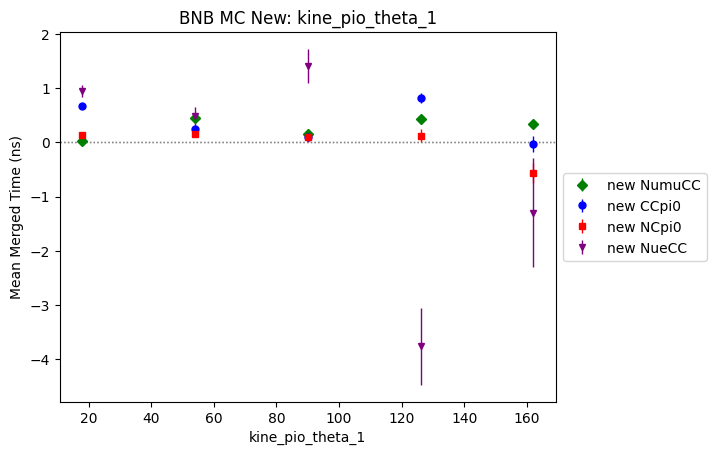

100%|██████████| 162/162 [00:00<?, ?it/s]


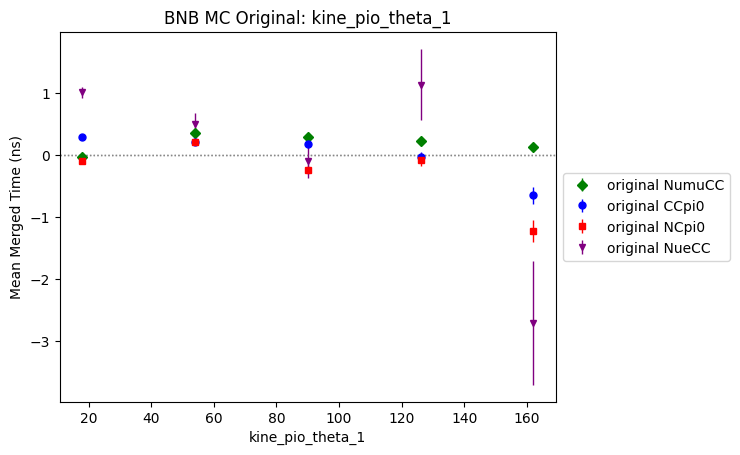

100%|██████████| 132/132 [00:00<?, ?it/s]


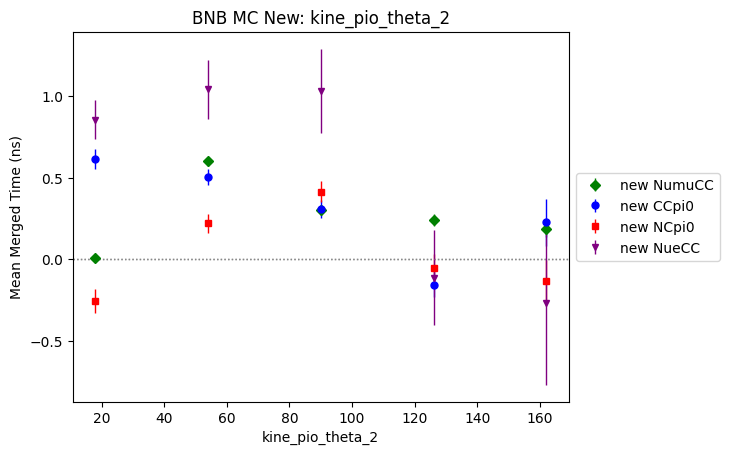

100%|██████████| 162/162 [00:00<00:00, 25061.86it/s]


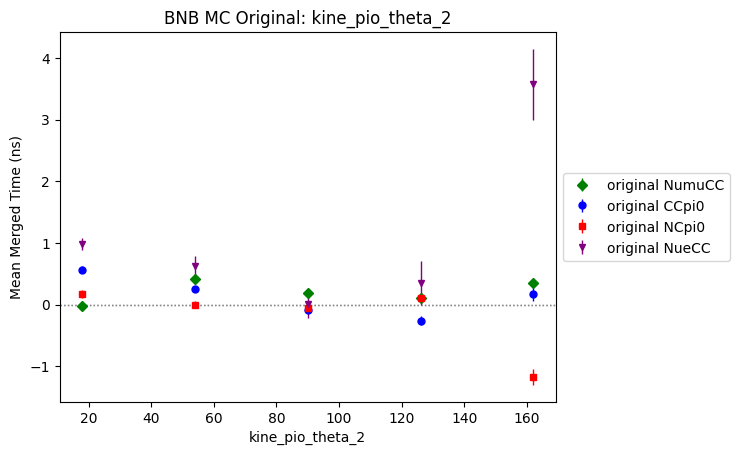

100%|██████████| 132/132 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


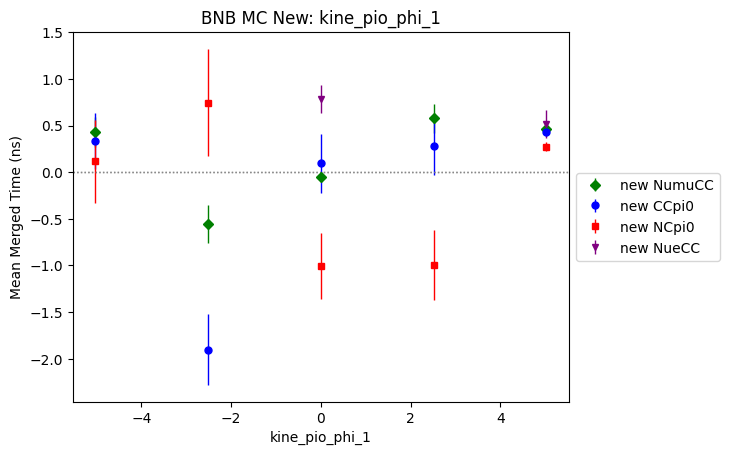

100%|██████████| 1084/1084 [00:00<00:00, 111286.88it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 162/162 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


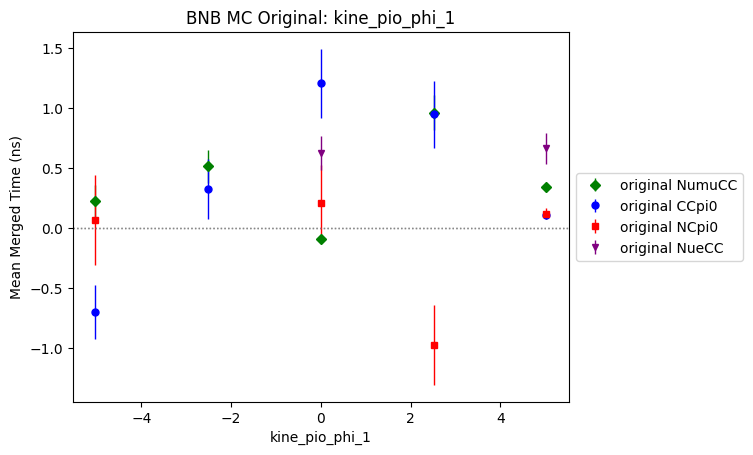

100%|██████████| 132/132 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


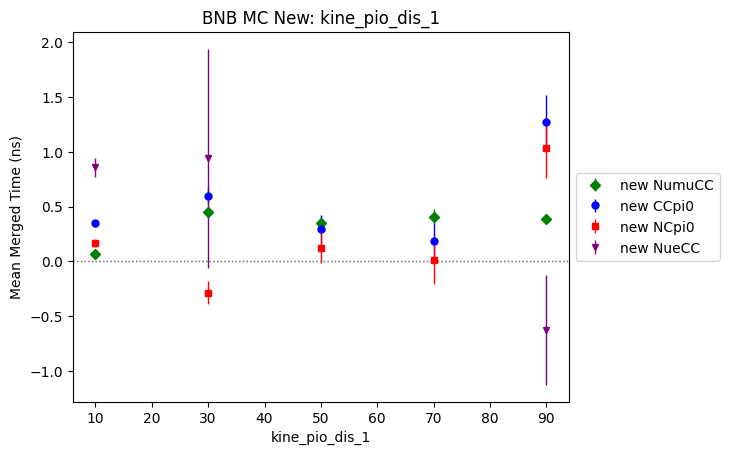

100%|██████████| 162/162 [00:00<00:00, 18797.09it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


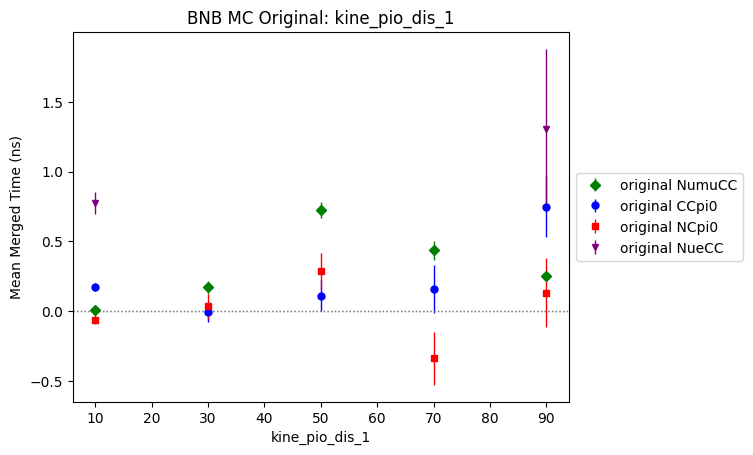

100%|██████████| 132/132 [00:00<?, ?it/s]


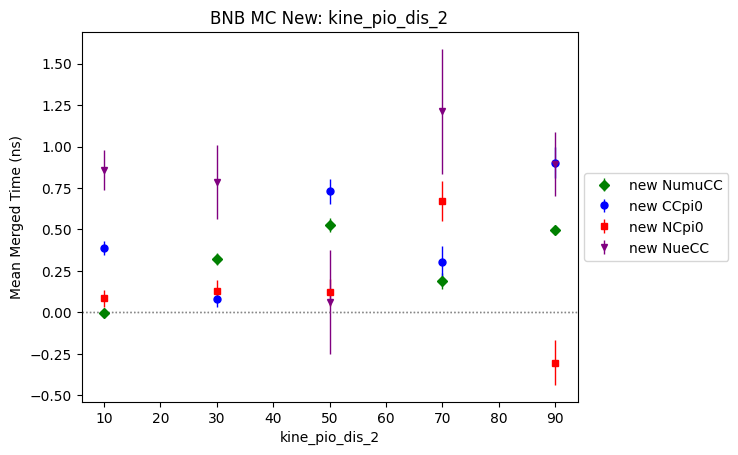

100%|██████████| 162/162 [00:00<?, ?it/s]


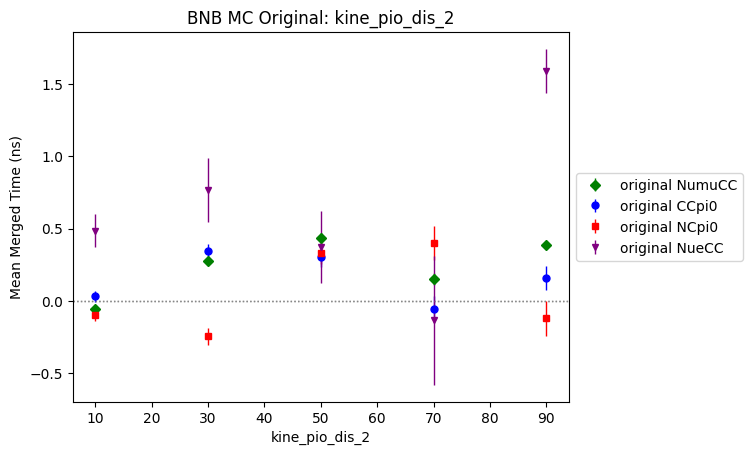

100%|██████████| 132/132 [00:00<?, ?it/s]


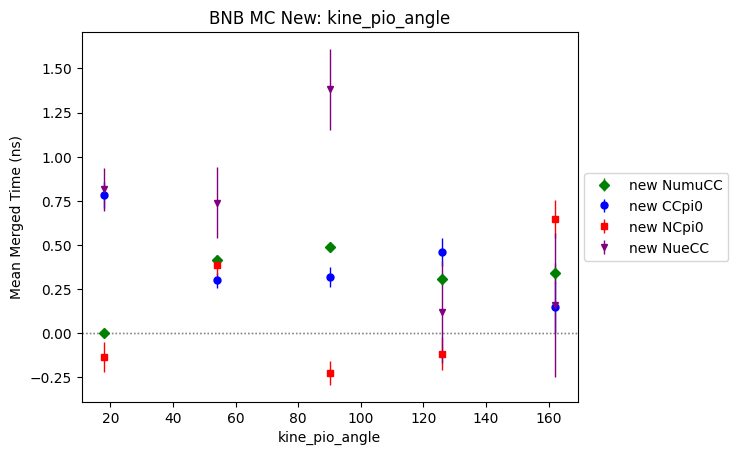

100%|██████████| 162/162 [00:00<00:00, 52832.38it/s]


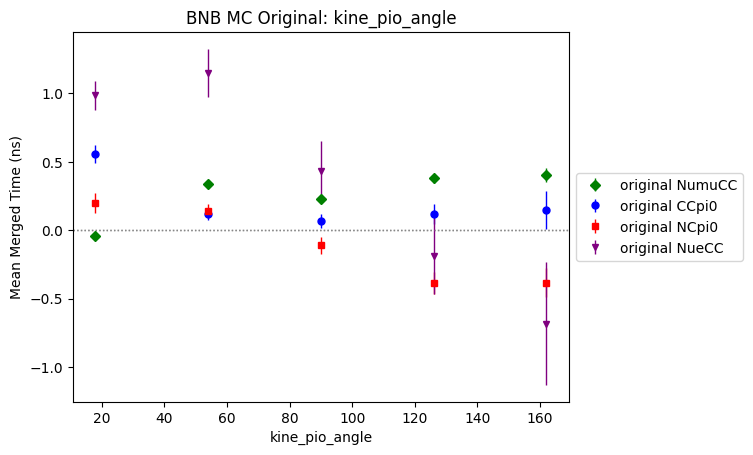

100%|██████████| 132/132 [00:00<?, ?it/s]


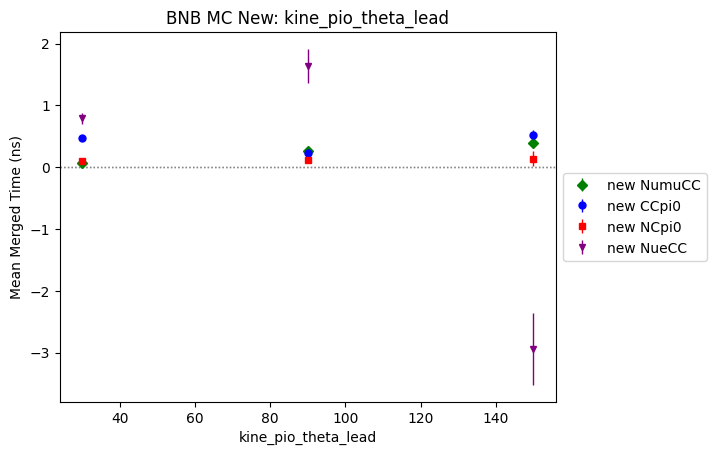

100%|██████████| 162/162 [00:00<?, ?it/s]


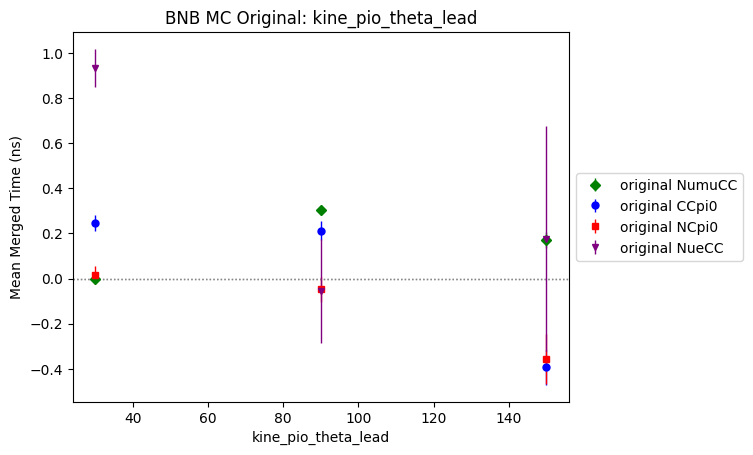

100%|██████████| 132/132 [00:00<?, ?it/s]


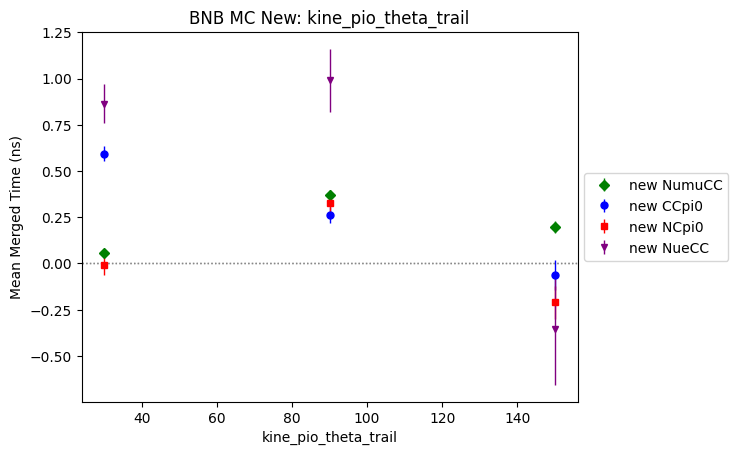

100%|██████████| 162/162 [00:00<?, ?it/s]


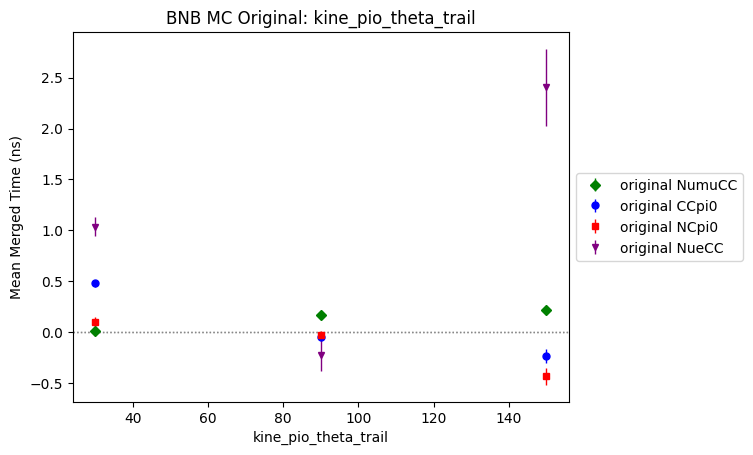

100%|██████████| 132/132 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


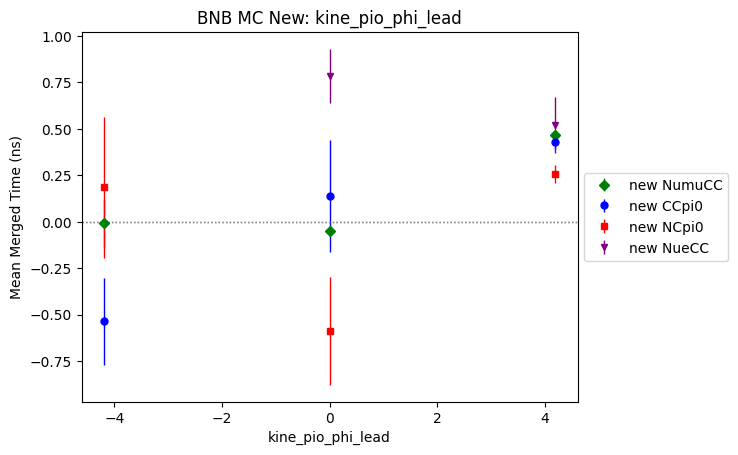

100%|██████████| 162/162 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


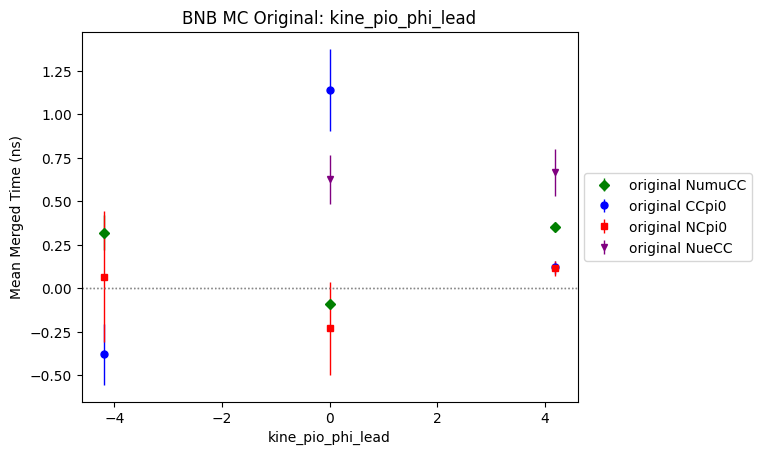

100%|██████████| 132/132 [00:00<?, ?it/s]


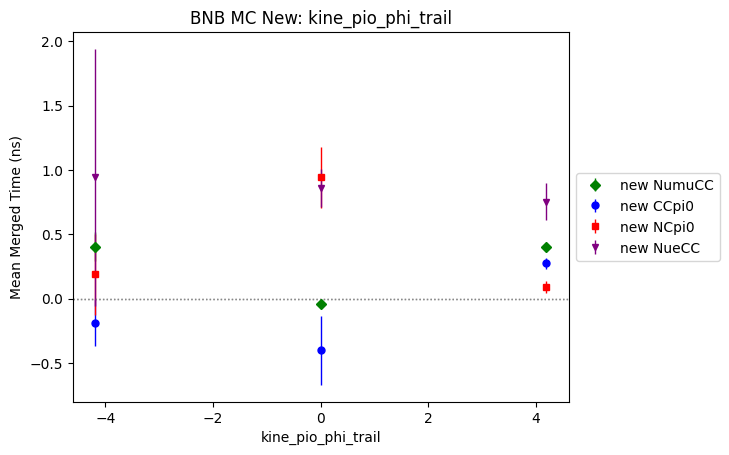

100%|██████████| 162/162 [00:00<?, ?it/s]


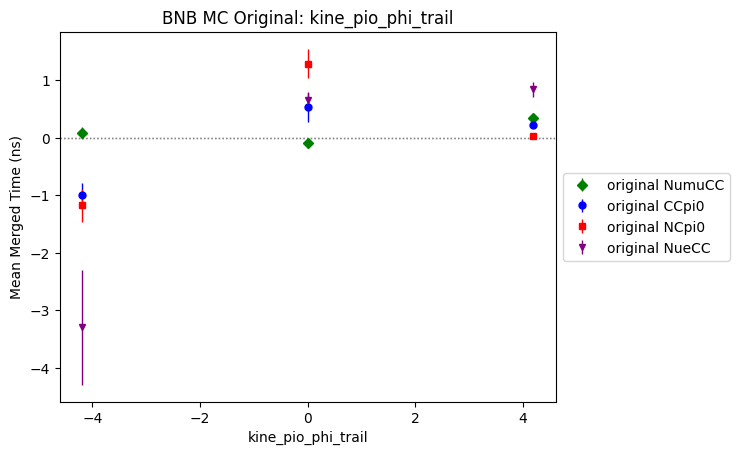

100%|██████████| 132/132 [00:00<00:00, 30600.13it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


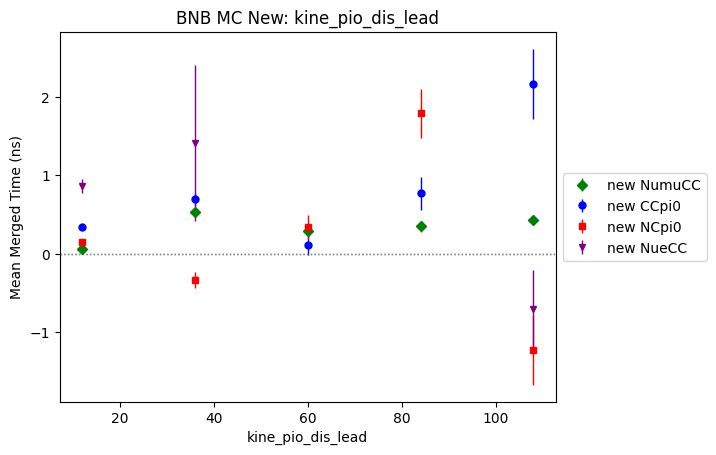

100%|██████████| 162/162 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


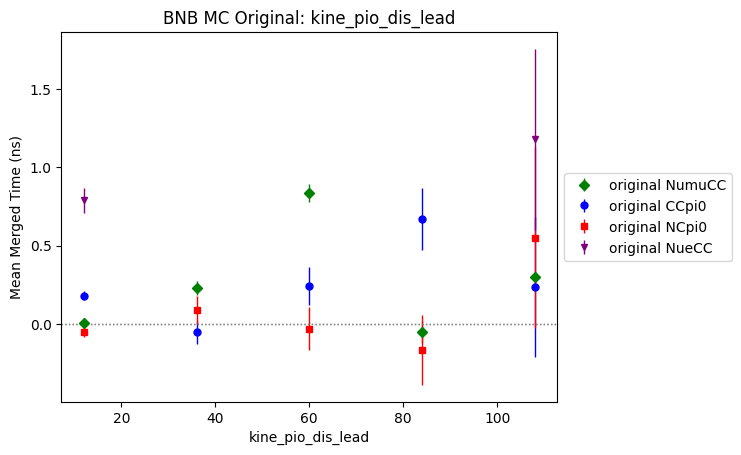

100%|██████████| 132/132 [00:00<?, ?it/s]


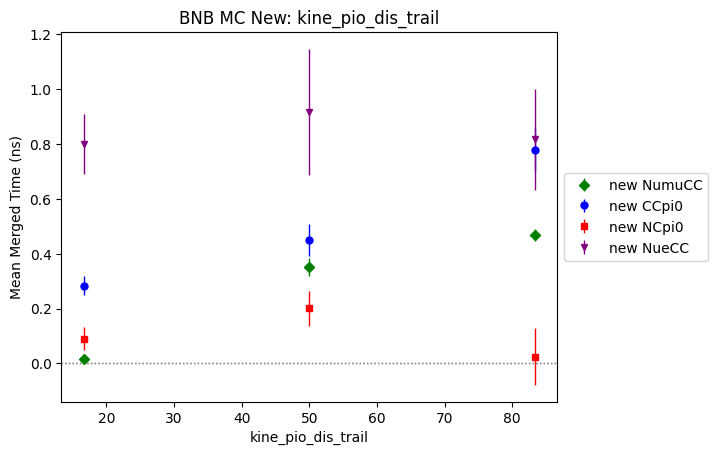

100%|██████████| 162/162 [00:00<?, ?it/s]


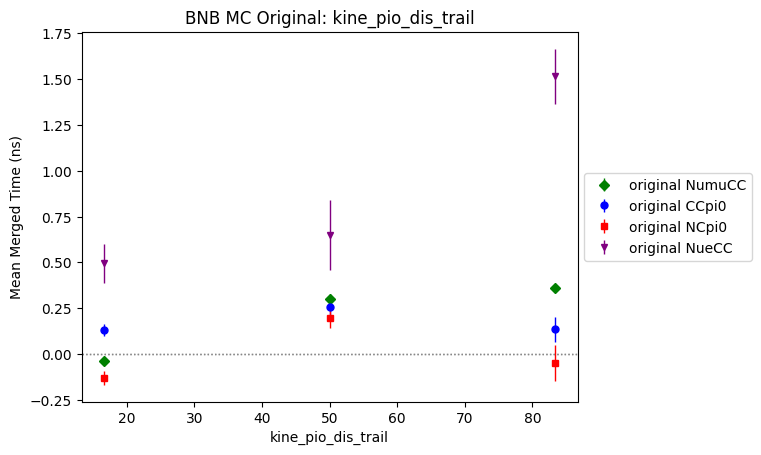

100%|██████████| 132/132 [00:00<00:00, 19255.99it/s]


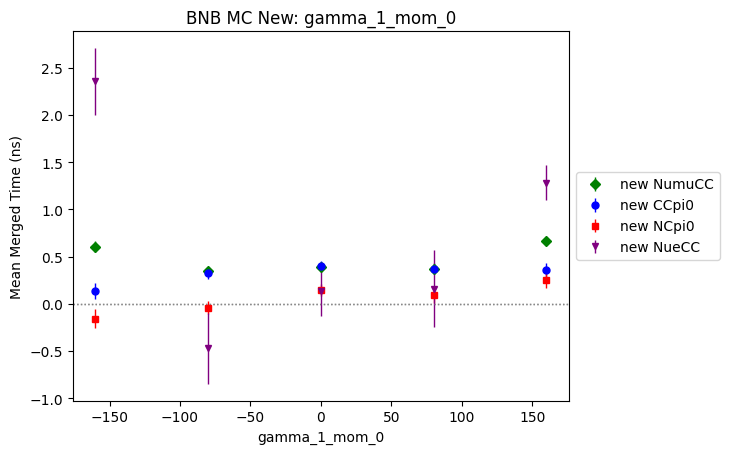

100%|██████████| 162/162 [00:00<?, ?it/s]


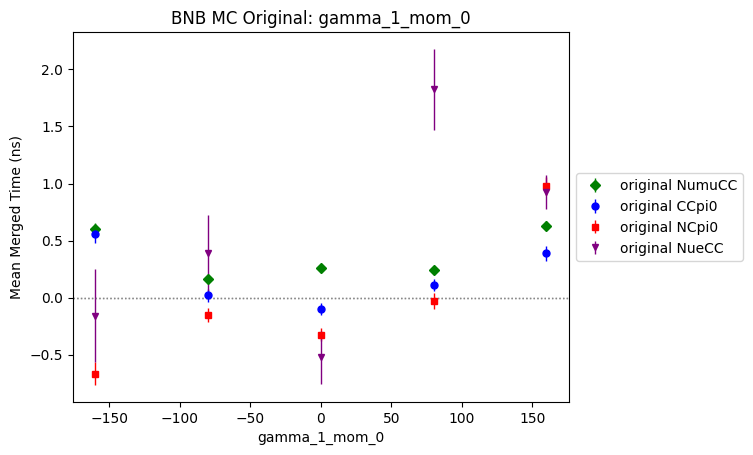

100%|██████████| 132/132 [00:00<?, ?it/s]


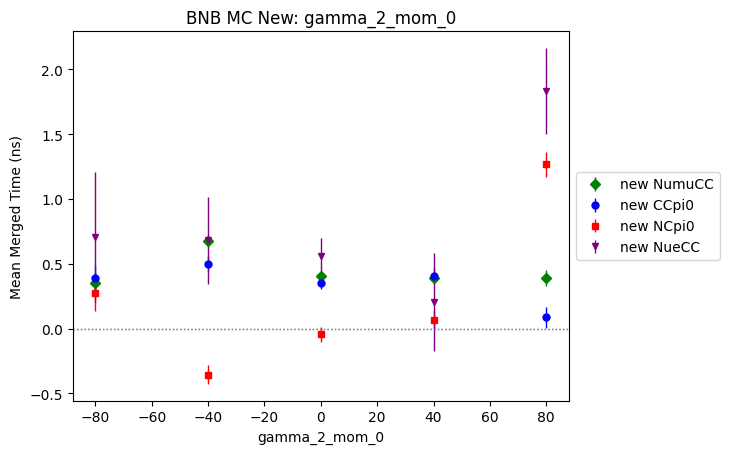

100%|██████████| 162/162 [00:00<00:00, 44480.05it/s]


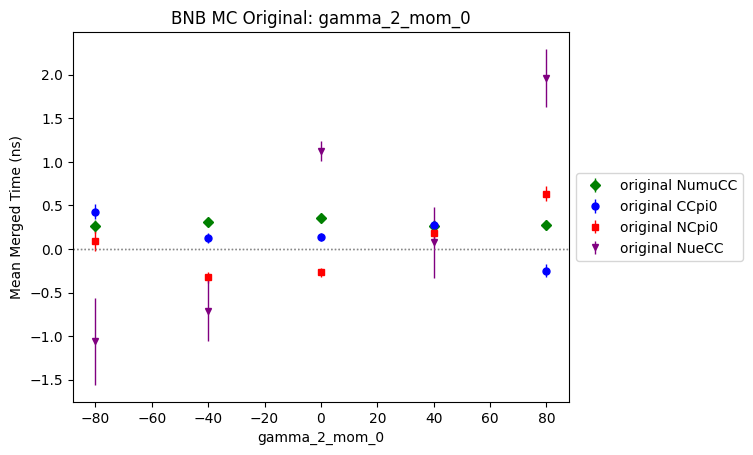

100%|██████████| 132/132 [00:00<?, ?it/s]


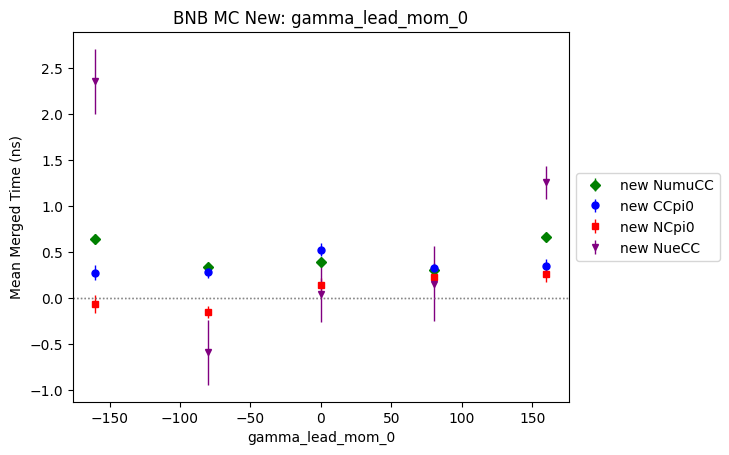

100%|██████████| 162/162 [00:00<?, ?it/s]


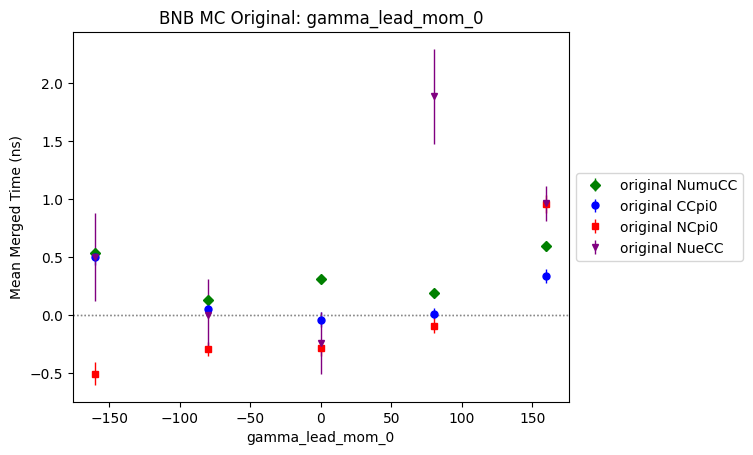

100%|██████████| 132/132 [00:00<?, ?it/s]


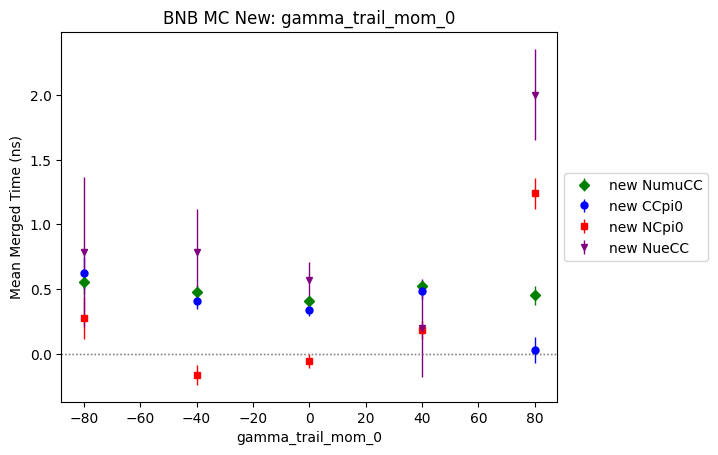

100%|██████████| 162/162 [00:00<?, ?it/s]


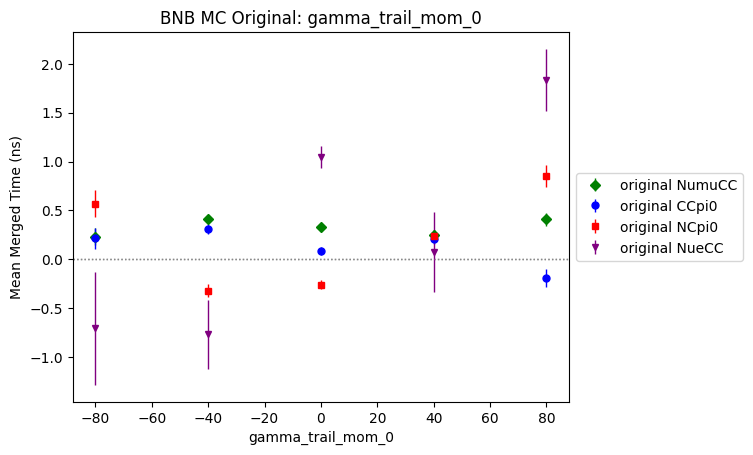

100%|██████████| 132/132 [00:00<?, ?it/s]


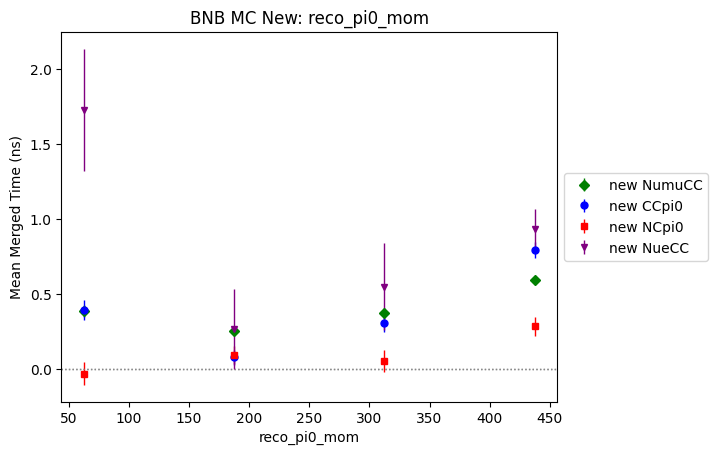

100%|██████████| 162/162 [00:00<?, ?it/s]


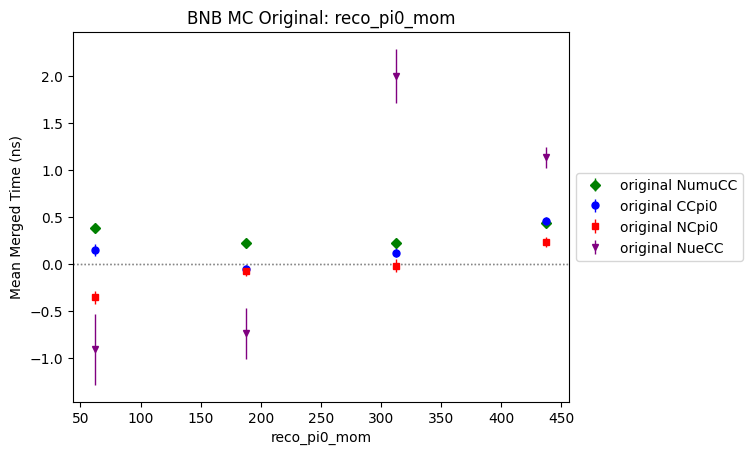

100%|██████████| 132/132 [00:00<00:00, 108750.37it/s]


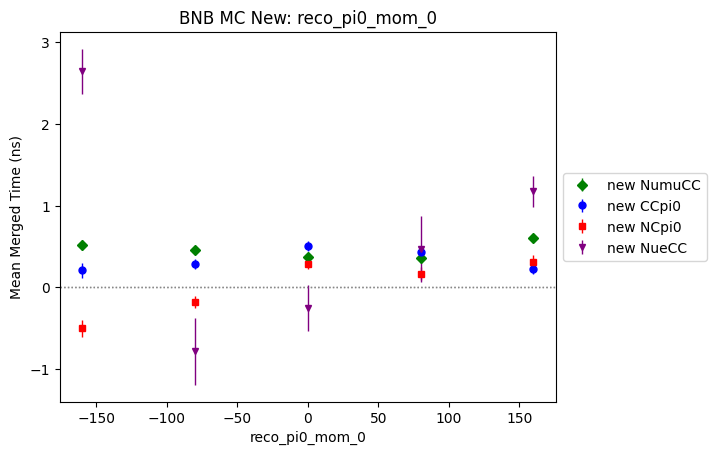

100%|██████████| 162/162 [00:00<00:00, 79666.70it/s]


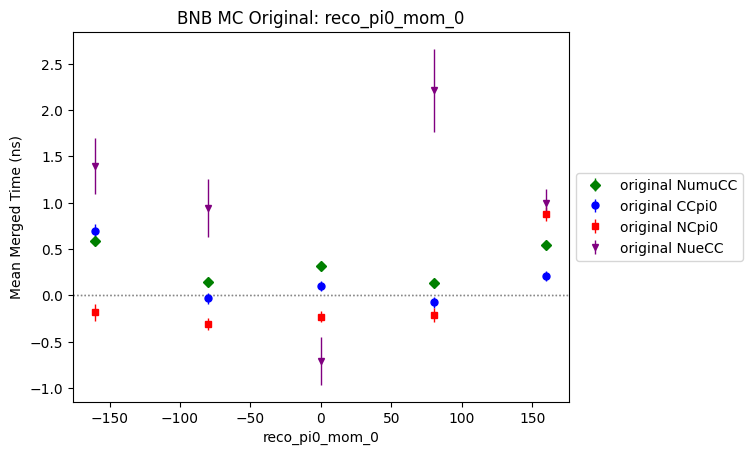

100%|██████████| 132/132 [00:00<00:00, 61619.16it/s]


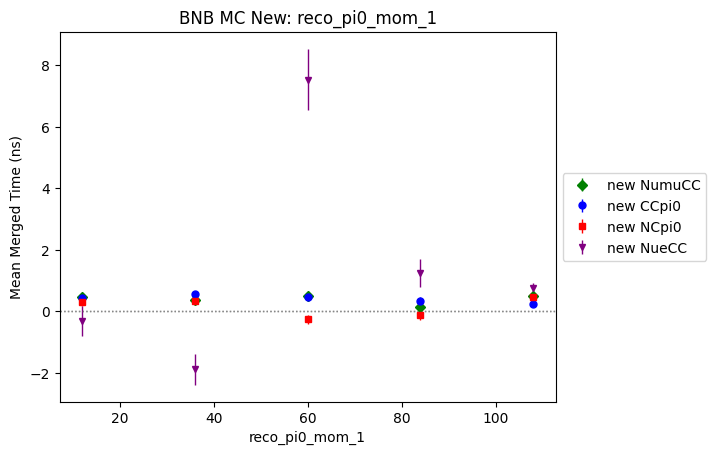

100%|██████████| 162/162 [00:00<00:00, 37428.51it/s]


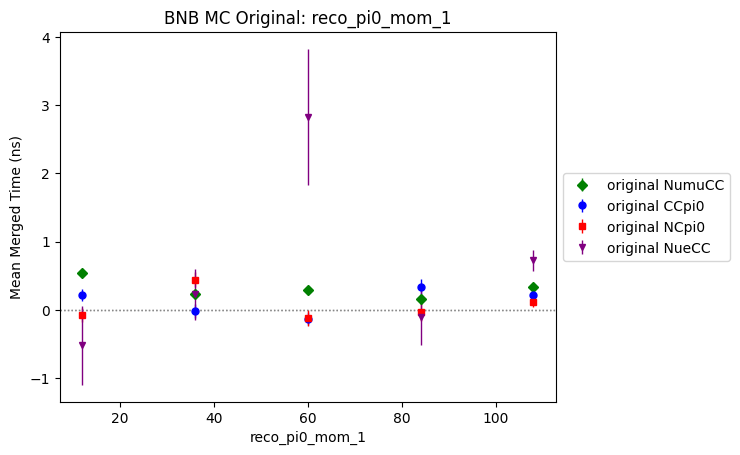

100%|██████████| 132/132 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


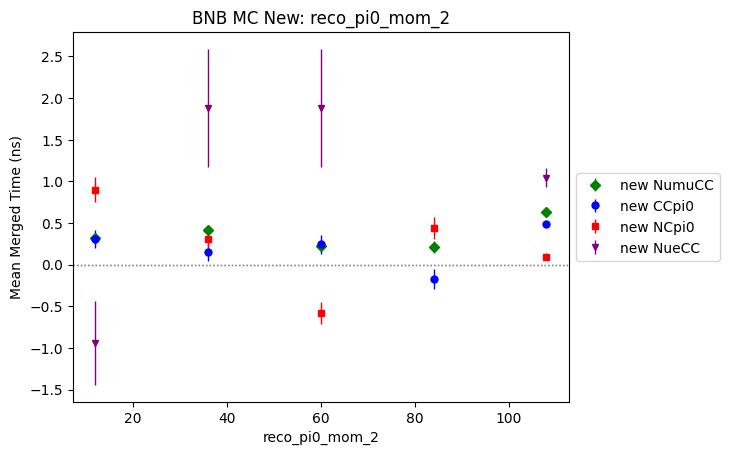

100%|██████████| 162/162 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


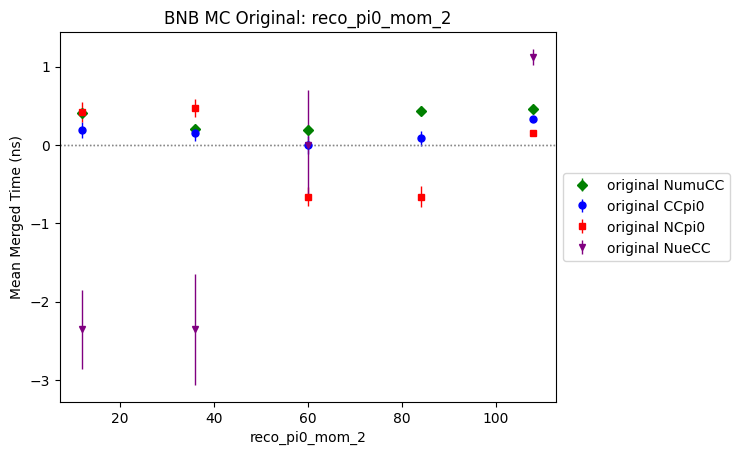

100%|██████████| 132/132 [00:00<?, ?it/s]


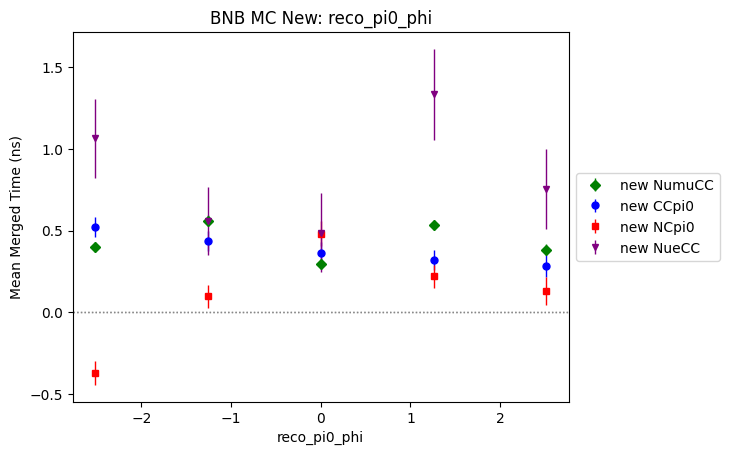

100%|██████████| 162/162 [00:00<?, ?it/s]


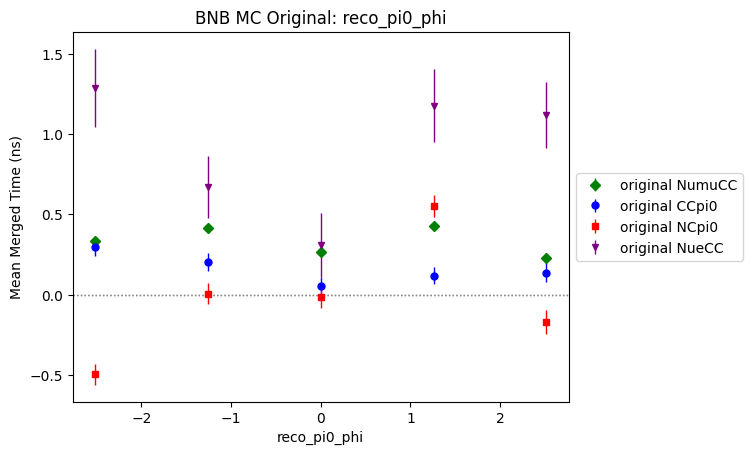

100%|██████████| 132/132 [00:00<?, ?it/s]


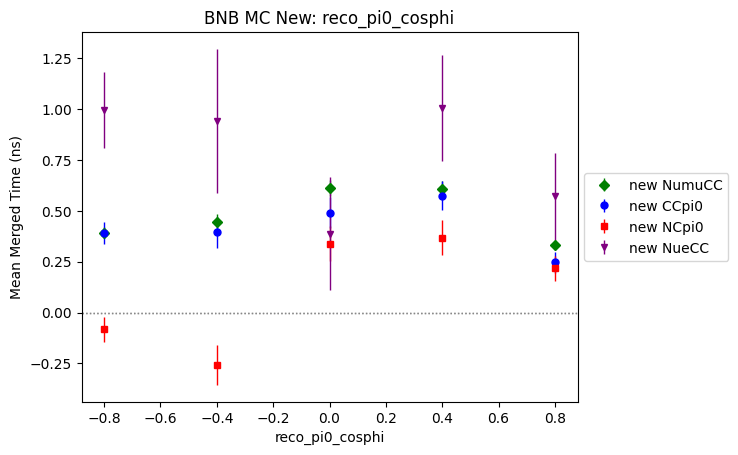

100%|██████████| 162/162 [00:00<?, ?it/s]


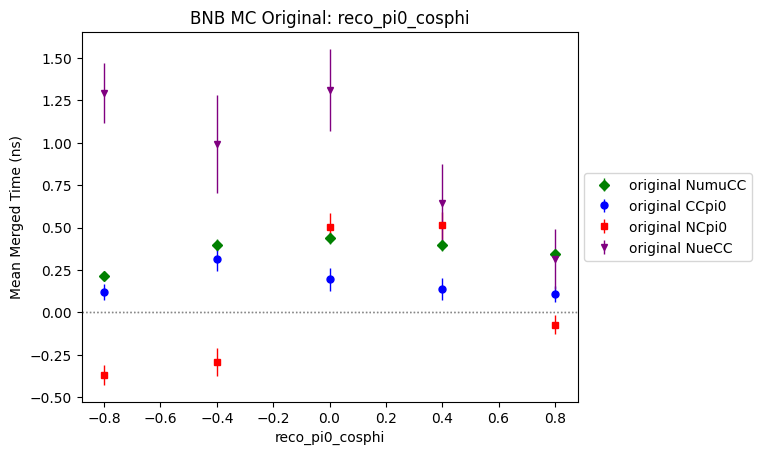

100%|██████████| 132/132 [00:00<?, ?it/s]


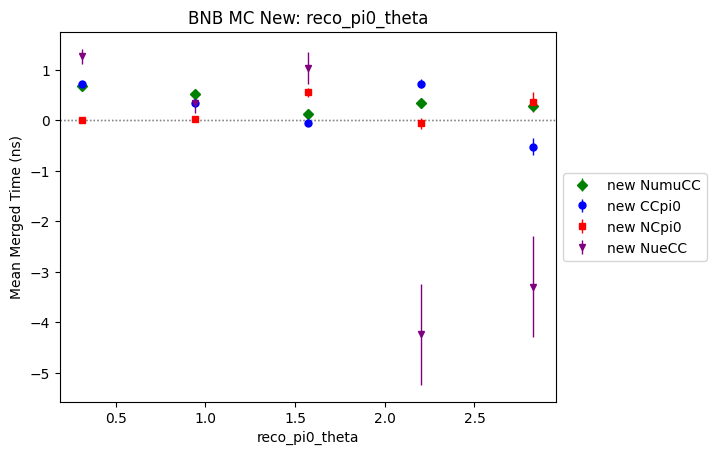

100%|██████████| 162/162 [00:00<?, ?it/s]


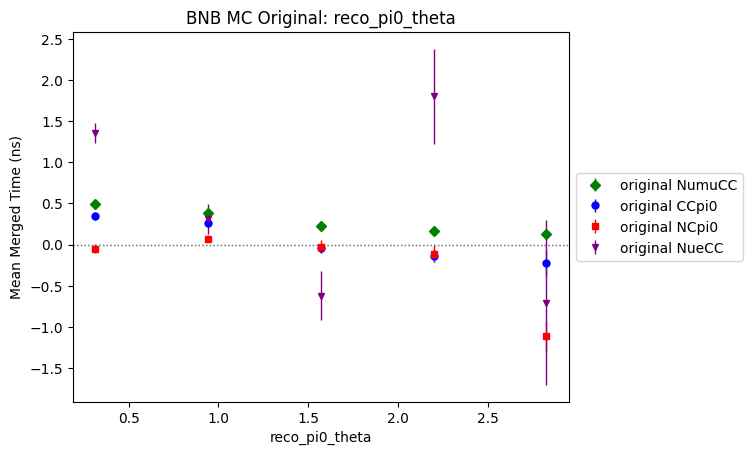

100%|██████████| 132/132 [00:00<?, ?it/s]


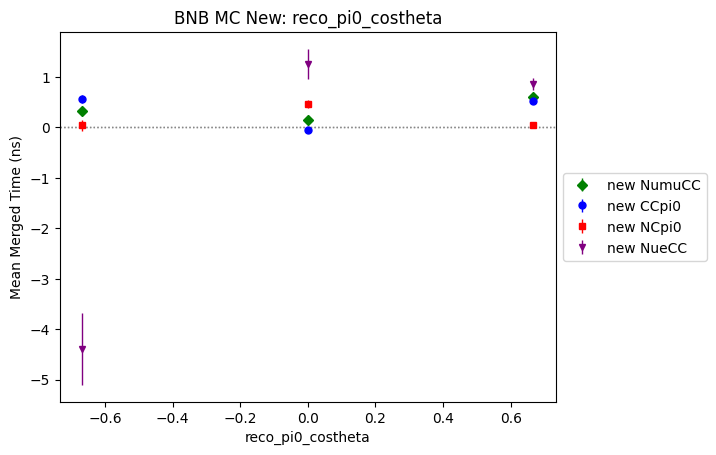

100%|██████████| 162/162 [00:00<00:00, 38818.40it/s]


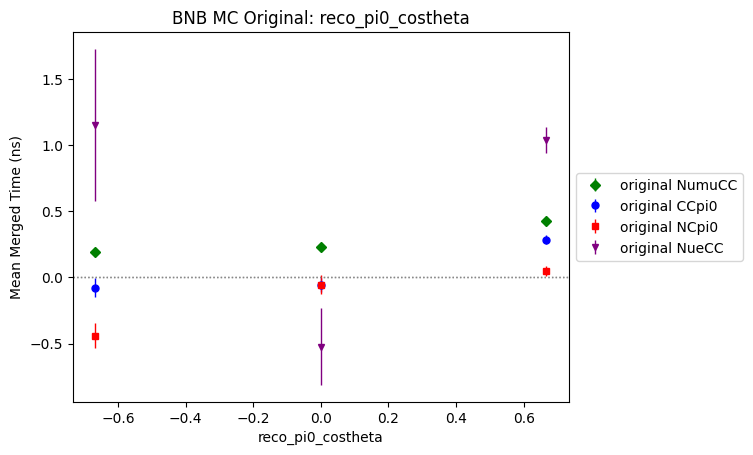

100%|██████████| 15525/15525 [00:00<00:00, 344060.62it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 1277/1277 [00:00<00:00, 185307.44it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 908/908 [00:00<00:00, 87662.92it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scal

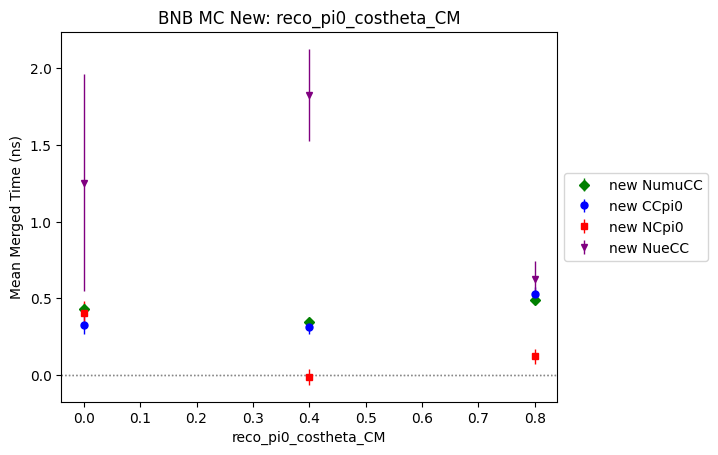

100%|██████████| 19309/19309 [00:00<00:00, 293146.28it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 1577/1577 [00:00<00:00, 174993.85it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 1084/1084 [00:00<00:00, 130227.29it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in s

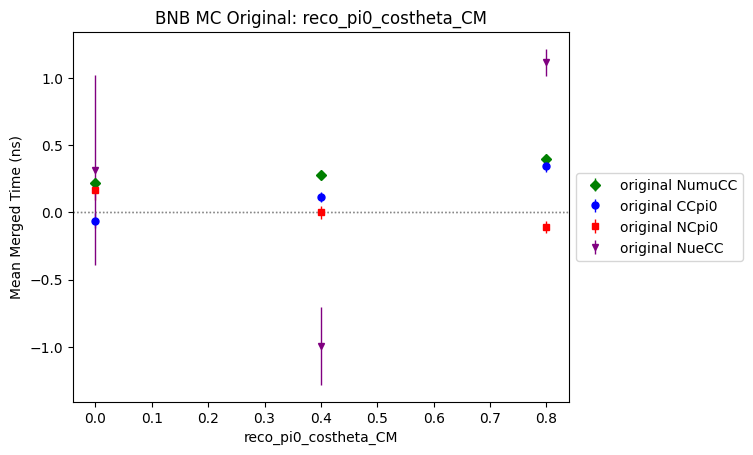

100%|██████████| 132/132 [00:00<00:00, 33330.21it/s]


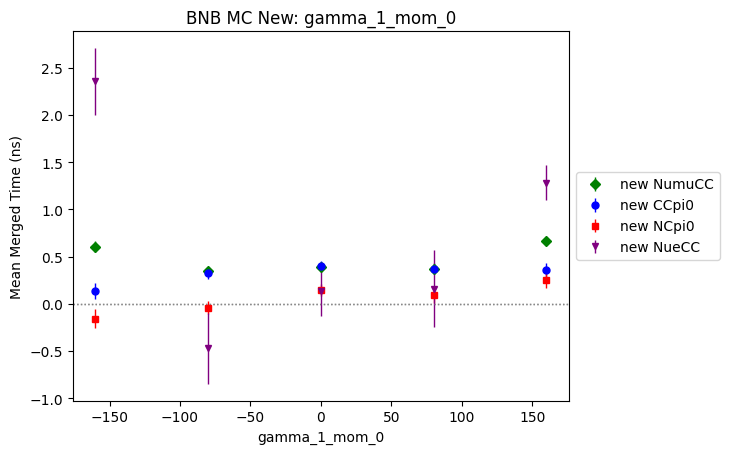

100%|██████████| 162/162 [00:00<00:00, 53485.30it/s]


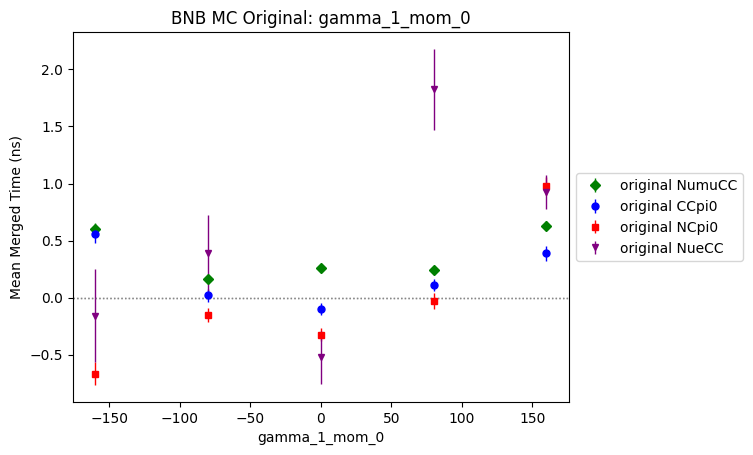

100%|██████████| 132/132 [00:00<?, ?it/s]


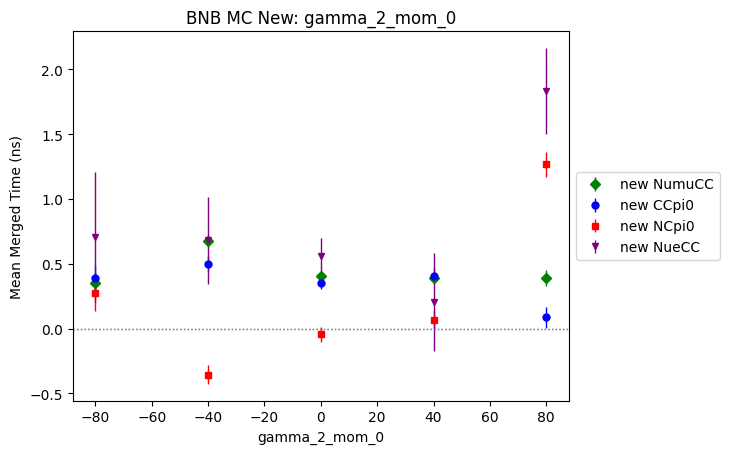

100%|██████████| 162/162 [00:00<00:00, 50992.66it/s]


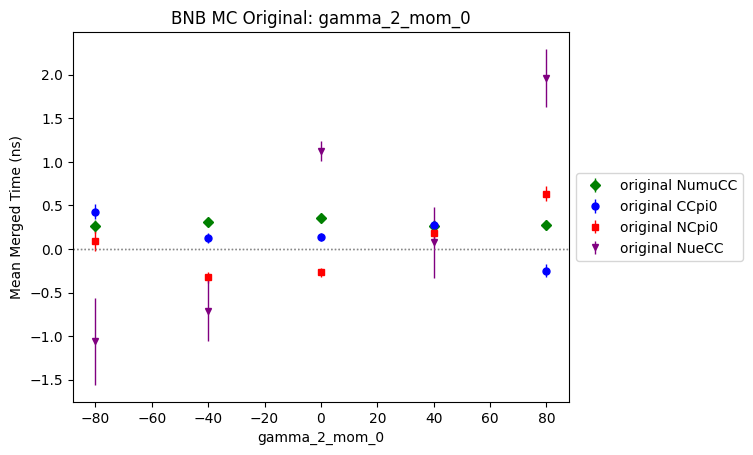

100%|██████████| 132/132 [00:00<?, ?it/s]


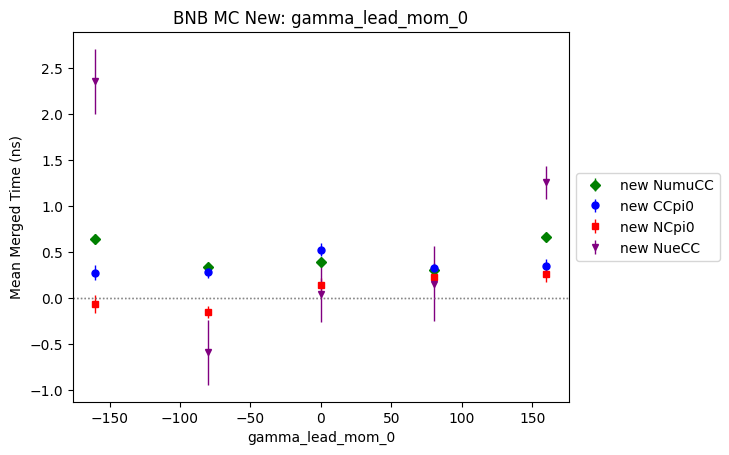

100%|██████████| 162/162 [00:00<00:00, 80325.95it/s]


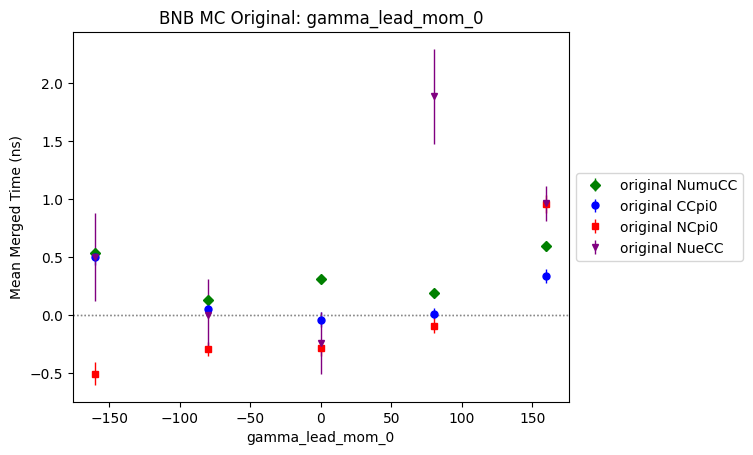

100%|██████████| 132/132 [00:00<?, ?it/s]


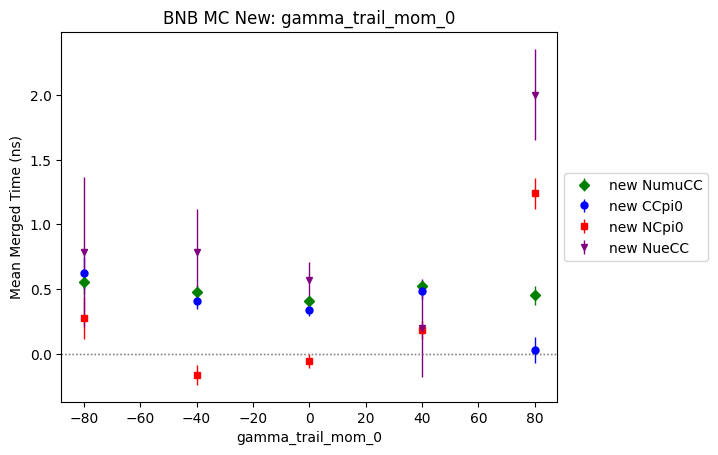

100%|██████████| 162/162 [00:00<?, ?it/s]


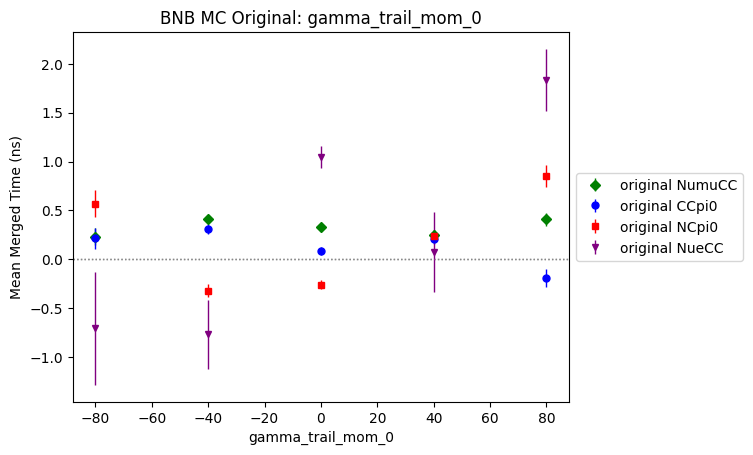

100%|██████████| 132/132 [00:00<00:00, 26200.75it/s]


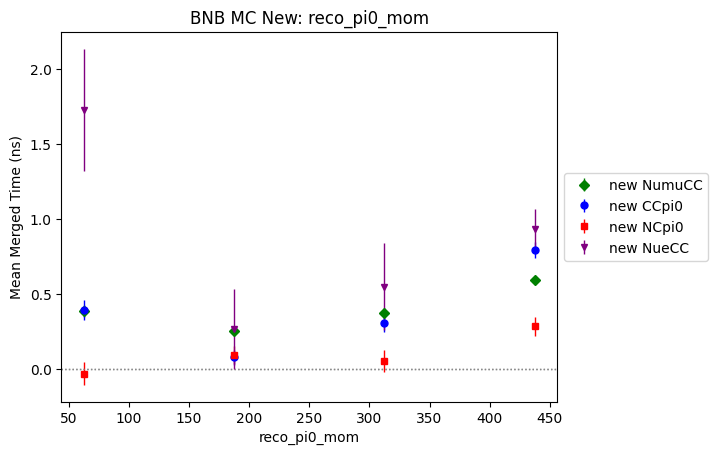

100%|██████████| 162/162 [00:00<?, ?it/s]


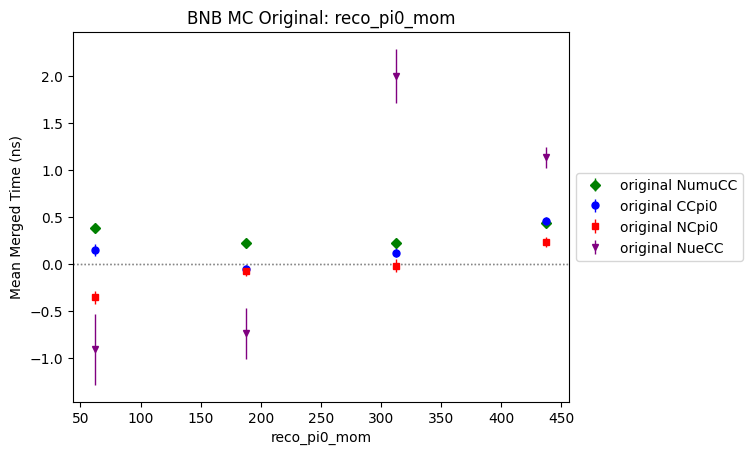

100%|██████████| 132/132 [00:00<00:00, 130917.03it/s]


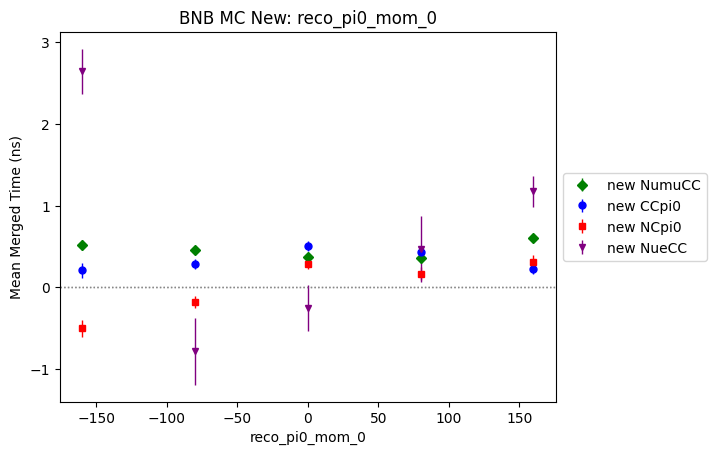

100%|██████████| 162/162 [00:00<00:00, 80755.56it/s]


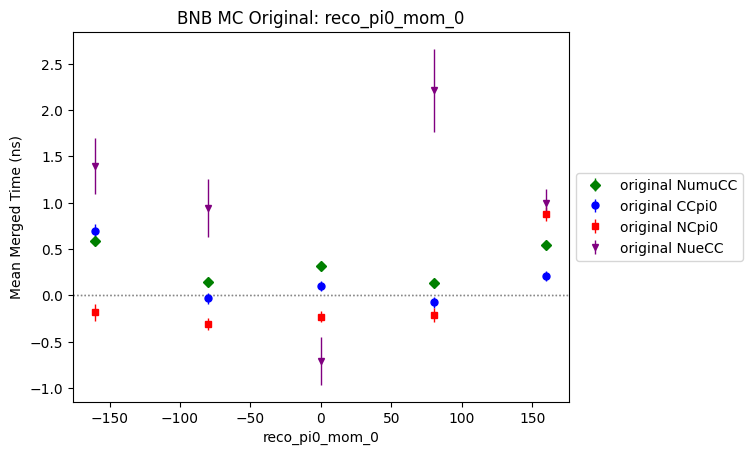

100%|██████████| 132/132 [00:00<00:00, 115271.32it/s]


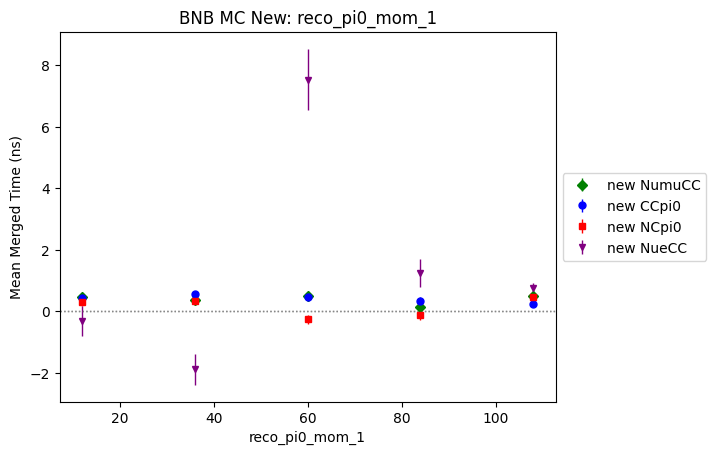

100%|██████████| 162/162 [00:00<?, ?it/s]


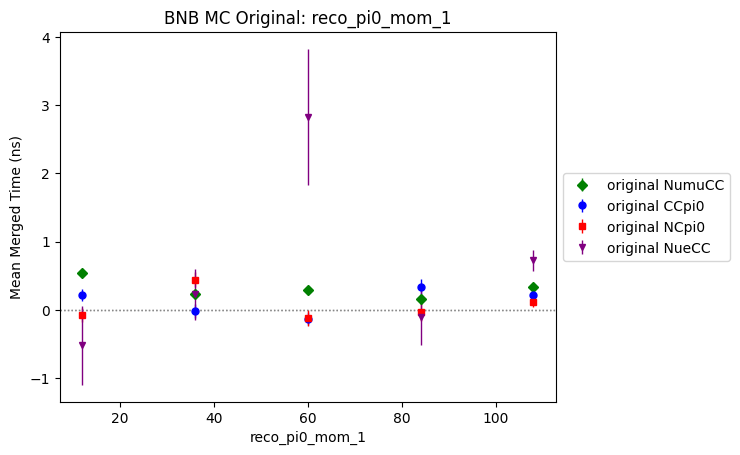

100%|██████████| 132/132 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


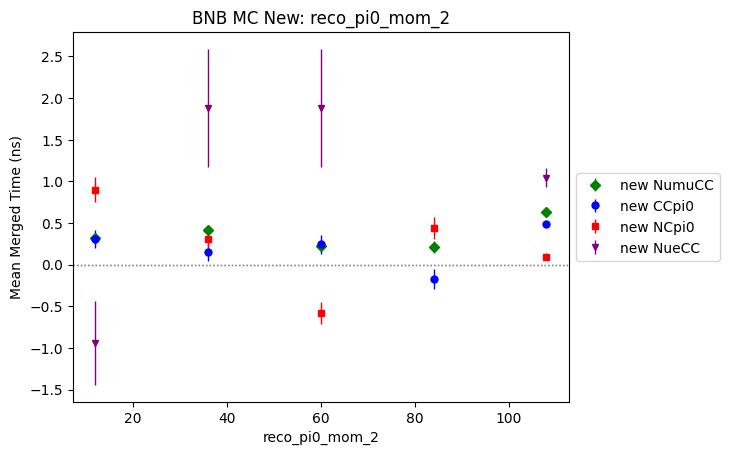

100%|██████████| 162/162 [00:00<?, ?it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


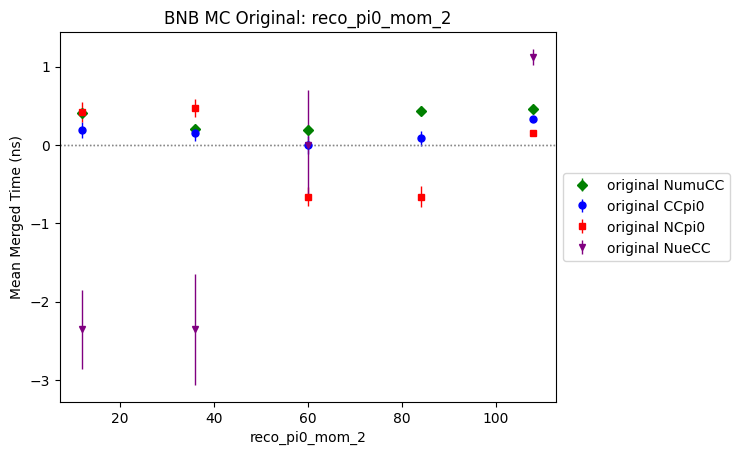

100%|██████████| 132/132 [00:00<?, ?it/s]


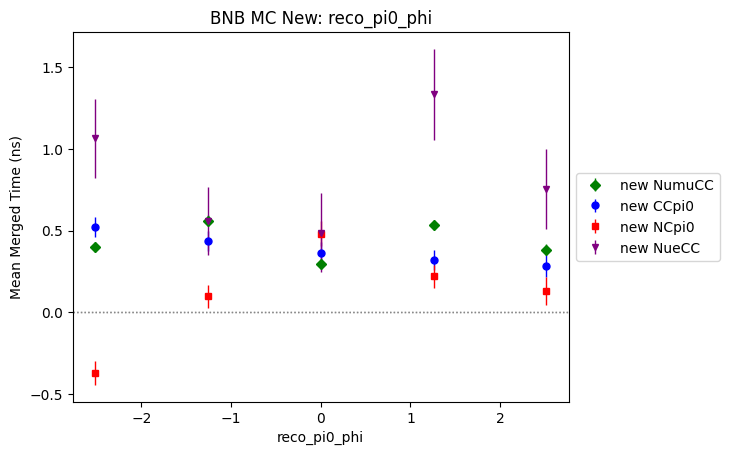

100%|██████████| 162/162 [00:00<?, ?it/s]


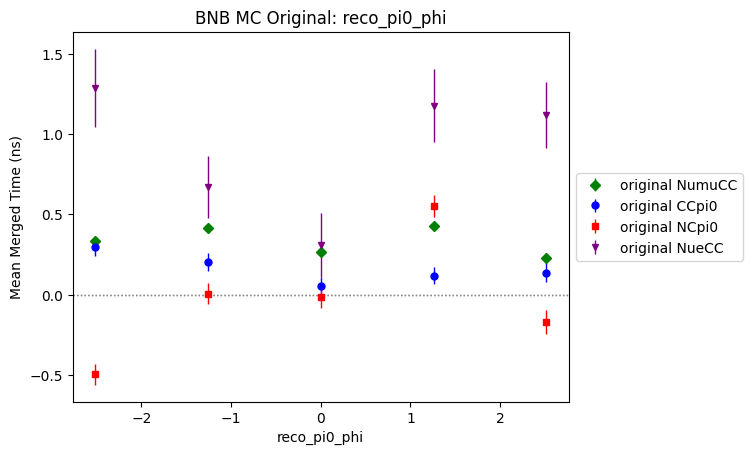

100%|██████████| 132/132 [00:00<?, ?it/s]


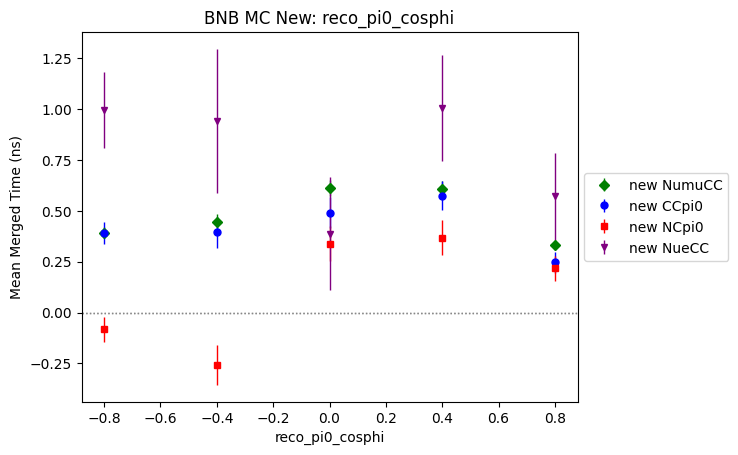

100%|██████████| 162/162 [00:00<?, ?it/s]


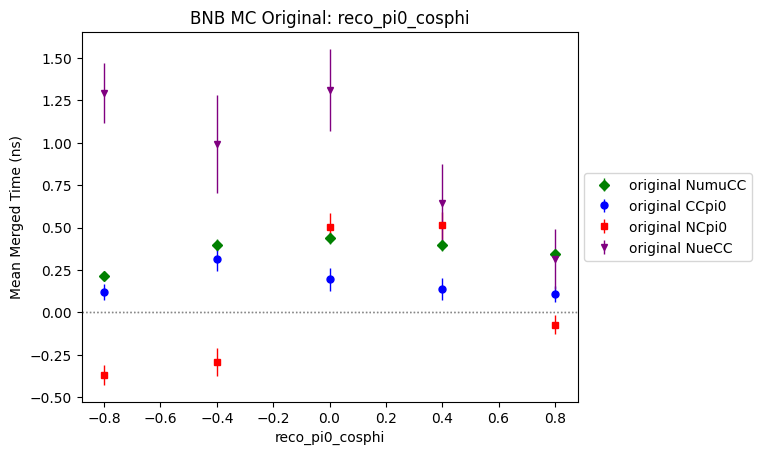

100%|██████████| 132/132 [00:00<?, ?it/s]


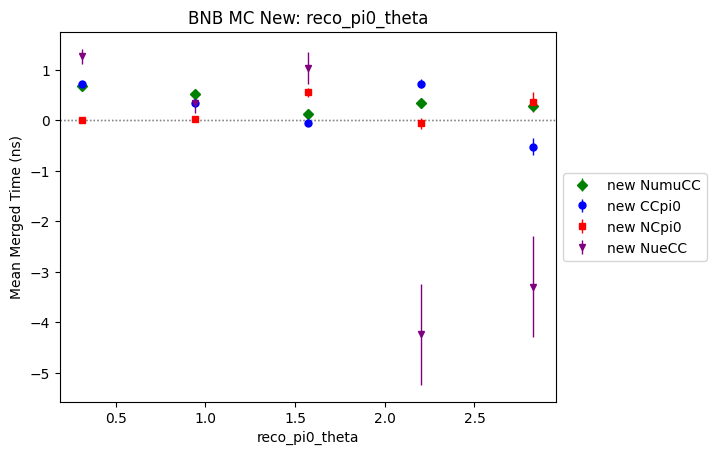

100%|██████████| 162/162 [00:00<00:00, 32570.09it/s]


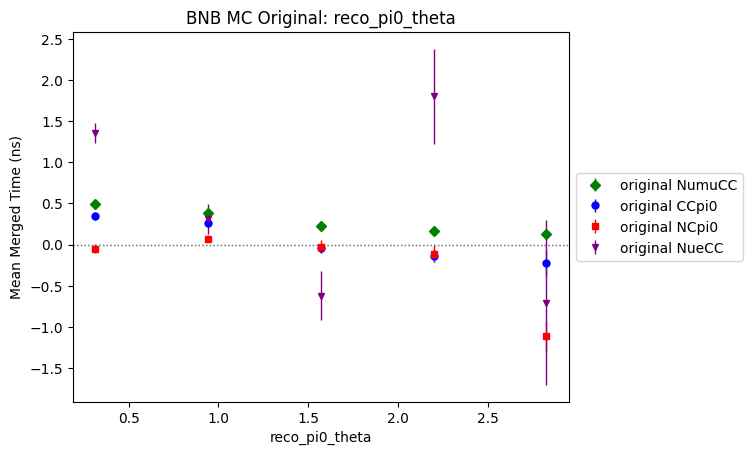

100%|██████████| 132/132 [00:00<?, ?it/s]


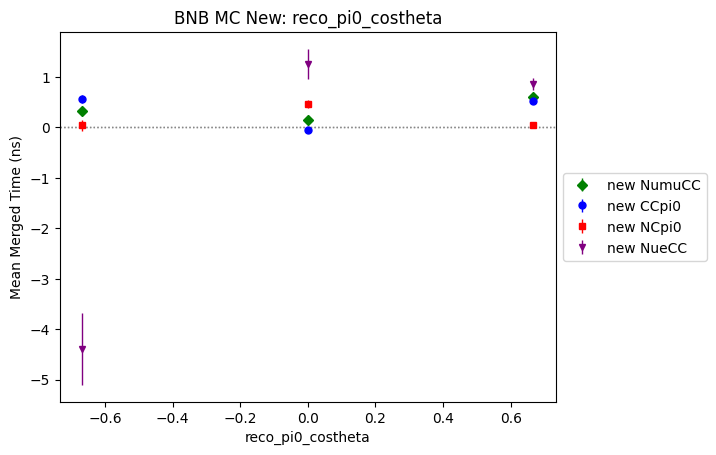

100%|██████████| 162/162 [00:00<?, ?it/s]


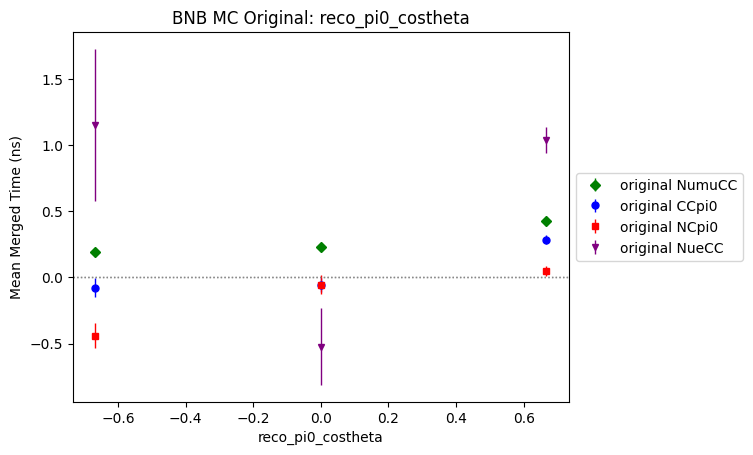

100%|██████████| 15525/15525 [00:00<00:00, 241580.48it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 1277/1277 [00:00<00:00, 154533.36it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 908/908 [00:00<00:00, 74450.25it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scal

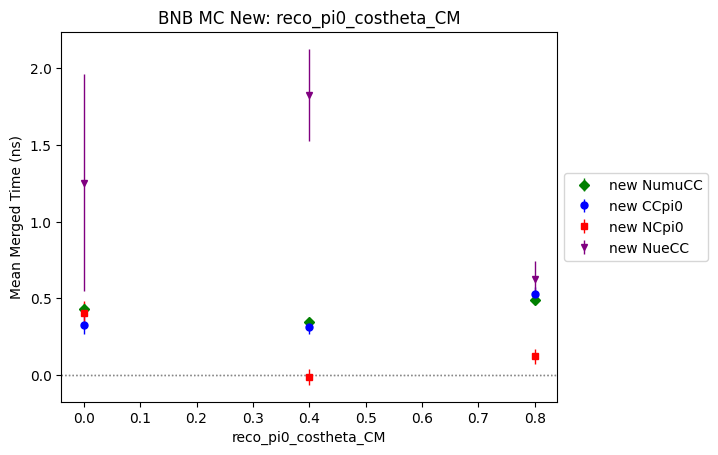

100%|██████████| 19309/19309 [00:00<00:00, 322764.78it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 1577/1577 [00:00<00:00, 109013.88it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
100%|██████████| 1084/1084 [00:00<00:00, 111093.82it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_15248\1550675211.py:35: RuntimeWarning: invalid value encountered in s

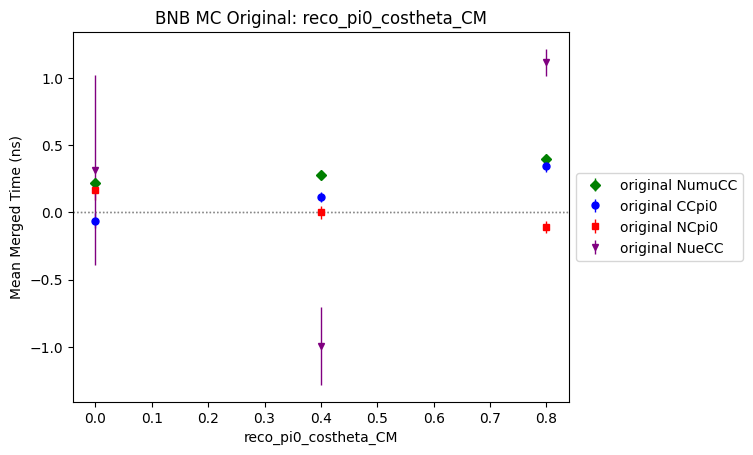

In [ ]:
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30)
plt.show()
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30, "orig")
plt.show()

plot_merge_time_spread("reco_nuvtxY", np.linspace(-120,120, 6), 10)
plt.show()
plot_merge_time_spread("reco_nuvtxY", np.linspace(-120,120, 6), 10, "orig")
plt.show()

plot_merge_time_spread("reco_nuvtxZ", np.linspace(0, 1100, 6), 20)
plt.show()
plot_merge_time_spread("reco_nuvtxZ", np.linspace(0, 1100, 6), 40, "orig")
plt.show()

plot_merge_time_spread("flash_measPe", np.linspace(0, 8000, 6), 30)
plt.show()
plot_merge_time_spread("flash_measPe", np.linspace(0, 8000, 6), 30, "orig")
plt.show()

plot_merge_time_spread("kine_reco_Enu", np.linspace(0, 2000, 6), 40)
plt.show()
plot_merge_time_spread("kine_reco_Enu", np.linspace(0, 2000, 6), 50, "orig")
plt.show()

plot_merge_time_spread("Ehadron", np.linspace(0,2500,6) , 40)
plt.show()
plot_merge_time_spread("Ehadron", np.linspace(0,2500,6), 92, "orig")
plt.show()

'''plot_merge_time_spread("Ehadron", [0, 300, 450, 700, 800, 1100, 2500], 40)
plt.show()
plot_merge_time_spread("Ehadron", [0, 300, 450, 700, 800, 1100, 2500], 92, "orig")
plt.show()'''

plot_merge_time_spread("reco_proton_costheta", np.linspace(-1,1), 90)
plt.show()
plot_merge_time_spread("reco_proton_costheta", np.linspace(-1,1), 60, "orig")
plt.show()

plot_merge_time_spread("reco_proton_phi", np.linspace(-np.pi, np.pi, 6), 30)
plt.show()
plot_merge_time_spread("reco_proton_phi", np.linspace(-np.pi, np.pi, 6), 30, "orig")
plt.show()

plot_merge_time_spread("kine_pio_energy_1", np.linspace(0, 600, 6), 100)
plt.show()
plot_merge_time_spread("kine_pio_energy_1", np.linspace(0, 600, 6), 100, "orig")
plt.show()

plot_merge_time_spread("kine_pio_energy_2", np.linspace(0, 600, 6), 100)
plt.show()
plot_merge_time_spread("kine_pio_energy_2", np.linspace(0, 600, 6), 100, "orig")
plt.show()

plot_merge_time_spread("kine_pio_theta_1", np.linspace(0, 180, 6), 80)
plt.show()
plot_merge_time_spread("kine_pio_theta_1", np.linspace(0, 180, 6), 80, "orig")
plt.show()

plot_merge_time_spread("kine_pio_theta_2", np.linspace(0, 180, 6), 70)
plt.show()
plot_merge_time_spread("kine_pio_theta_2", np.linspace(0, 180, 6), 80, "orig")
plt.show()

plot_merge_time_spread("kine_pio_phi_1", np.linspace(-2*np.pi, 2*np.pi, 6), 80)
plt.show()
plot_merge_time_spread("kine_pio_phi_1", np.linspace(-2*np.pi, 2*np.pi, 6), 100, "orig")
plt.show()

plot_merge_time_spread("kine_pio_dis_1", np.linspace(0, 100, 6), 30)
plt.show()
plot_merge_time_spread("kine_pio_dis_1", np.linspace(0, 100, 6), 70, "orig")
plt.show()

plot_merge_time_spread("kine_pio_dis_2", np.linspace(0, 100, 6), 30)
plt.show()
plot_merge_time_spread("kine_pio_dis_2", np.linspace(0, 100, 6), 70, "orig")
plt.show()

plot_merge_time_spread("kine_pio_angle", np.linspace(0, 180, 6), 80)
plt.show()
plot_merge_time_spread("kine_pio_angle", np.linspace(0, 180, 6), 80, "orig")
plt.show()

plot_merge_time_spread("kine_pio_theta_lead", np.linspace(0, 180, 4), 80)
plt.show()
plot_merge_time_spread("kine_pio_theta_lead", np.linspace(0, 180, 4), 80, "orig")
plt.show()

plot_merge_time_spread("kine_pio_theta_trail", np.linspace(0, 180, 4), 70)
plt.show()
plot_merge_time_spread("kine_pio_theta_trail", np.linspace(0, 180, 4), 80, "orig")
plt.show()

plot_merge_time_spread("kine_pio_phi_lead", np.linspace(-2*np.pi, 2*np.pi, 4), 80)
plt.show()
plot_merge_time_spread("kine_pio_phi_lead", np.linspace(-2*np.pi, 2*np.pi, 4), 100, "orig")
plt.show()

plot_merge_time_spread("kine_pio_phi_trail", np.linspace(-2*np.pi, 2*np.pi, 4), 10)
plt.show()
plot_merge_time_spread("kine_pio_phi_trail", np.linspace(-2*np.pi, 2*np.pi, 4), 20, "orig")
plt.show()

plot_merge_time_spread("kine_pio_dis_lead", np.linspace(0, 120, 6), 20)
plt.show()
plot_merge_time_spread("kine_pio_dis_lead", np.linspace(0, 120, 6), 40, "orig")
plt.show()

plot_merge_time_spread("kine_pio_dis_trail", np.linspace(0, 100, 4), 20)
plt.show()
plot_merge_time_spread("kine_pio_dis_trail", np.linspace(0, 100, 4), 50, "orig")
plt.show()


plot_merge_time_spread("gamma_1_mom_0", np.linspace(-200, 200, 6), 20)
plt.show()
plot_merge_time_spread("gamma_1_mom_0", np.linspace(-200, 200, 6), 40, "orig")
plt.show()

plot_merge_time_spread("gamma_2_mom_0", np.linspace(-100, 100, 6), 20)
plt.show()
plot_merge_time_spread("gamma_2_mom_0", np.linspace(-100, 100, 6), 40, "orig")
plt.show()

plot_merge_time_spread("gamma_lead_mom_0", np.linspace(-200, 200, 6), 20)
plt.show()
plot_merge_time_spread("gamma_lead_mom_0", np.linspace(-200, 200, 6), 40, "orig")
plt.show()

plot_merge_time_spread("gamma_trail_mom_0", np.linspace(-100, 100, 6), 20)
plt.show()
plot_merge_time_spread("gamma_trail_mom_0", np.linspace(-100, 100, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom", np.linspace(0, 500, 5), 20)
plt.show()
plot_merge_time_spread("reco_pi0_mom", np.linspace(0, 500, 5), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom_0", np.linspace(-200, 200, 6), 20)
plt.show()
plot_merge_time_spread("reco_pi0_mom_0", np.linspace(-200, 200, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom_1", np.linspace(0, 120, 6), 15)
plt.show()
plot_merge_time_spread("reco_pi0_mom_1", np.linspace(0, 120, 6), 30, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom_2", np.linspace(0, 120, 6), 10)
plt.show()
plot_merge_time_spread("reco_pi0_mom_2", np.linspace(0, 120, 6), 20, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_phi", np.linspace(-np.pi, np.pi, 6), 25)
plt.show()
plot_merge_time_spread("reco_pi0_phi", np.linspace(-np.pi, np.pi, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_cosphi", np.linspace(-1, 1, 6), 15)
plt.show()
plot_merge_time_spread("reco_pi0_cosphi", np.linspace(-1, 1, 6), 30, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_theta", np.linspace(0, np.pi, 6), 20)
plt.show()
plot_merge_time_spread("reco_pi0_theta", np.linspace(0, np.pi, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_costheta", np.linspace(-1, 1, 4), 15)
plt.show()
plot_merge_time_spread("reco_pi0_costheta", np.linspace(-1, 1, 4), 30, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_costheta_CM", np.linspace(-1, 1, 6), 15)
plt.show()
plot_merge_time_spread("reco_pi0_costheta_CM", np.linspace(-1, 1, 6), 30, "orig")
plt.show()

plot_merge_time_spread("gamma_1_mom_0", np.linspace(-200, 200, 6), 20)
plt.show()
plot_merge_time_spread("gamma_1_mom_0", np.linspace(-200, 200, 6), 40, "orig")
plt.show()

plot_merge_time_spread("gamma_2_mom_0", np.linspace(-100, 100, 6), 20)
plt.show()
plot_merge_time_spread("gamma_2_mom_0", np.linspace(-100, 100, 6), 40, "orig")
plt.show()

plot_merge_time_spread("gamma_lead_mom_0", np.linspace(-200, 200, 6), 20)
plt.show()
plot_merge_time_spread("gamma_lead_mom_0", np.linspace(-200, 200, 6), 40, "orig")
plt.show()

plot_merge_time_spread("gamma_trail_mom_0", np.linspace(-100, 100, 6), 20)
plt.show()
plot_merge_time_spread("gamma_trail_mom_0", np.linspace(-100, 100, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom", np.linspace(0, 500, 5), 20)
plt.show()
plot_merge_time_spread("reco_pi0_mom", np.linspace(0, 500, 5), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom_0", np.linspace(-200, 200, 6), 20)
plt.show()
plot_merge_time_spread("reco_pi0_mom_0", np.linspace(-200, 200, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom_1", np.linspace(0, 120, 6), 15)
plt.show()
plot_merge_time_spread("reco_pi0_mom_1", np.linspace(0, 120, 6), 30, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_mom_2", np.linspace(0, 120, 6), 10)
plt.show()
plot_merge_time_spread("reco_pi0_mom_2", np.linspace(0, 120, 6), 20, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_phi", np.linspace(-np.pi, np.pi, 6), 25)
plt.show()
plot_merge_time_spread("reco_pi0_phi", np.linspace(-np.pi, np.pi, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_cosphi", np.linspace(-1, 1, 6), 15)
plt.show()
plot_merge_time_spread("reco_pi0_cosphi", np.linspace(-1, 1, 6), 30, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_theta", np.linspace(0, np.pi, 6), 20)
plt.show()
plot_merge_time_spread("reco_pi0_theta", np.linspace(0, np.pi, 6), 40, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_costheta", np.linspace(-1, 1, 4), 15)
plt.show()
plot_merge_time_spread("reco_pi0_costheta", np.linspace(-1, 1, 4), 30, "orig")
plt.show()

plot_merge_time_spread("reco_pi0_costheta_CM", np.linspace(-1, 1, 6), 15)
plt.show()
plot_merge_time_spread("reco_pi0_costheta_CM", np.linspace(-1, 1, 6), 30, "orig")
plt.show()


# Flatten w/ new MC

In [122]:
def merge_time_shifted(df, time_col="evtTimeNS_shifted", out_col="merge_time_new"):
    evtTimeNS = df[time_col].to_numpy()

    new_times = []

    for i in range(len(evtTimeNS)):
        
        if np.nan_to_num(evtTimeNS[i],nan=-999999,posinf=-999999,neginf=-999999)<=0:
            new_times.append(-9999)
            continue  
            
        gap=bnb_gap
        Shift=0.6833   
        TThelp=0

        TThelp = evtTimeNS[i]-Shift+gap*0.5

        TT_merged=(TThelp-(int((TThelp)/gap))*gap)-gap*0.5
            
        new_times.append(TT_merged)

    df["merge_time_new"] = new_times

In [123]:
df_bnb_mc["evtTimeNS_shifted"] = df_bnb_mc["evtTimeNS"]
df_bnb_mc["merge_time_new"] = df_bnb_mc["merge_time"]

mask_all = (
    (df_bnb_mc["merge_time"] > -9.42) & (df_bnb_mc["merge_time"] < 9.42) &
    (df_bnb_mc.eval(CCpi0_query) | df_bnb_mc.eval(NCpi0_query) | df_bnb_mc.eval("nue_score > 4"))
)

mask_showerMomentum = (
    (df_bnb_mc["merge_time"] > -9.42) & (df_bnb_mc["merge_time"] < 9.42) &
    (df_bnb_mc.eval("reco_showerMomentum>70 and reco_Emuon>200"))
)


df_bnb_mc.loc[mask_showerMomentum, "evtTimeNS_shifted"] += 0.006 * df_bnb_mc.loc[mask_showerMomentum, "reco_nuvtxX"]

merge_time_shifted(df_bnb_mc)


numuCC: Gaussian      mean: 3.6849   std: -0.0954   C: 0.0557
CCpi0: Gaussian      mean: -0.0953   std: -321.2773   C: 16.0285
NCpi0: Gaussian      mean: 0.9955   std: 0.2737   C: 0.0545
loose nueCC: Gaussian      mean: 4.2347   std: 0.2693   C: 0.053


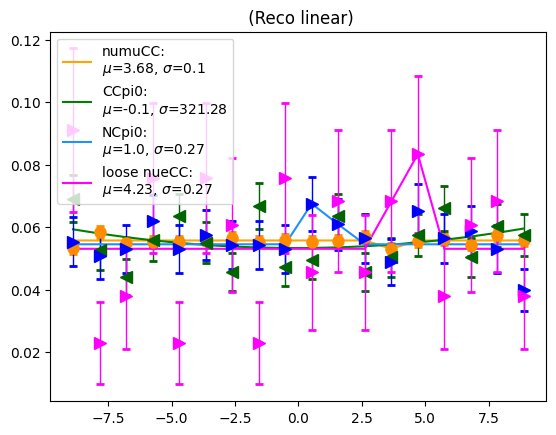

In [124]:
time_col = "merge_time_new"
label=""
nbins = 18
df=df_bnb_mc

# Helper for query string
time_query = f"{time_col}>-9.42 and {time_col}<9.42"

data_numuCC = df.query(time_query).query("numu_score>0.9")[time_col].to_numpy()
norm1 = len(data_numuCC)
y, xbins = np.histogram(data_numuCC, bins=nbins, range=(-9.42, 9.42))
x1 = get_bin_centers(xbins)
popt, pcov = curve_fit(gaus, x1, y / norm1)
print("numuCC: Gaussian      mean:", round(popt[1], 4), "  std:", round(popt[2], 4), "  C:", round(popt[3], 4))

data_CCpi0 = df.query(time_query).query(CCpi0_query)[time_col].to_numpy()
norm2 = len(data_CCpi0)
y2, xbins = np.histogram(data_CCpi0, bins=nbins, range=(-9.42, 9.42))
x2 = get_bin_centers(xbins)
popt2, pcov2 = curve_fit(gaus, x2, y2 / norm2)
print("CCpi0: Gaussian      mean:", round(popt2[1], 4), "  std:", round(popt2[2], 4), "  C:", round(popt2[3], 4))

data_NCpi0 = df.query(time_query).query(NCpi0_query)[time_col].to_numpy()
norm3 = len(data_NCpi0)
y3, xbins = np.histogram(data_NCpi0, bins=nbins, range=(-9.42, 9.42))
x3 = get_bin_centers(xbins)
popt3, pcov3 = curve_fit(gaus, x3, y3 / norm3)
print("NCpi0: Gaussian      mean:", round(popt3[1], 4), "  std:", round(popt3[2], 4), "  C:", round(popt3[3], 4))

data_nueCC = df.query(time_query).query("nue_score>4")[time_col].to_numpy()
norm4 = len(data_nueCC)
y4, xbins = np.histogram(data_nueCC, bins=nbins, range=(-9.42, 9.42))
x4 = get_bin_centers(xbins)
popt4, pcov4 = curve_fit(gaus, x4, y4 / norm4)
print("loose nueCC: Gaussian      mean:", round(popt4[1], 4), "  std:", round(popt4[2], 4), "  C:", round(popt4[3], 4))

if(time_col == "merge_time_linear_sps"):
    label = label + " (spacepoints)"
else:
    label = label + " (Reco linear)"

plt.figure()
plt.title(label)
plt.errorbar(x1, y / norm1, yerr=np.sqrt(y) / norm1, ms=8, lw=1, fmt='o', ecolor='darkorange', color='darkorange', capsize=3, capthick=2)
plt.plot(x1, gaus(x1, *popt), color='orange', label='numuCC:' + '\n' + f"$\mu$={round(popt[1],2)}, $\\sigma$={round(abs(popt[2]),2)}")

plt.errorbar(x2, y2 / norm2, yerr=np.sqrt(y2) / norm2, ms=8, lw=1, fmt='<', ecolor='darkgreen', color='darkgreen', capsize=3, capthick=2)
plt.plot(x2, gaus(x2, *popt2), color='green', label='CCpi0:' + '\n' + f"$\mu$={round(popt2[1],2)}, $\\sigma$={round(abs(popt2[2]),2)}")

plt.errorbar(x3, y3 / norm3, yerr=np.sqrt(y3) / norm3, ms=8, lw=1, fmt='>', ecolor='blue', color='blue', capsize=3, capthick=2)
plt.plot(x3, gaus(x3, *popt3), color='dodgerblue', label='NCpi0:' + '\n' + f"$\mu$={round(popt3[1],2)}, $\\sigma$={round(abs(popt3[2]),2)}")


plt.errorbar(x4,y4/norm4,yerr=np.sqrt(y4)/norm4,ms=8, lw=1,fmt='>',ecolor = 'magenta',color='magenta', capsize=3, capthick=2)
plt.plot(x4,gaus(x4,*popt4),color='magenta',label='loose nueCC:'+'\n'+f"$\mu$={round(popt4[1],2)}, $\\sigma$={round(abs(popt4[2]),2)}")

'''shift_text = f"Shifts:\nCCpi0 = {shift_ccpi0}\nNCpi0 = {shift_ncpi0}\nNue = {shift_nue}"
plt.gcf().text(1.1, 0.2, shift_text, fontsize=12, va='center', ha='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
'''

plt.legend()
plt.show()

100%|██████████| 132/132 [00:00<?, ?it/s]


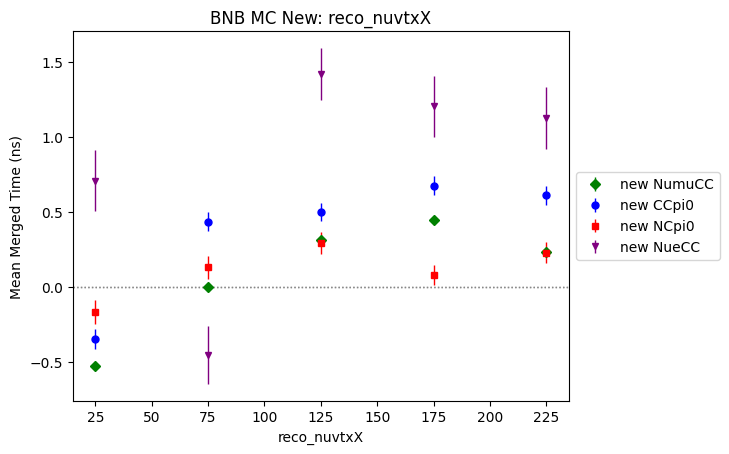

100%|██████████| 162/162 [00:00<?, ?it/s]


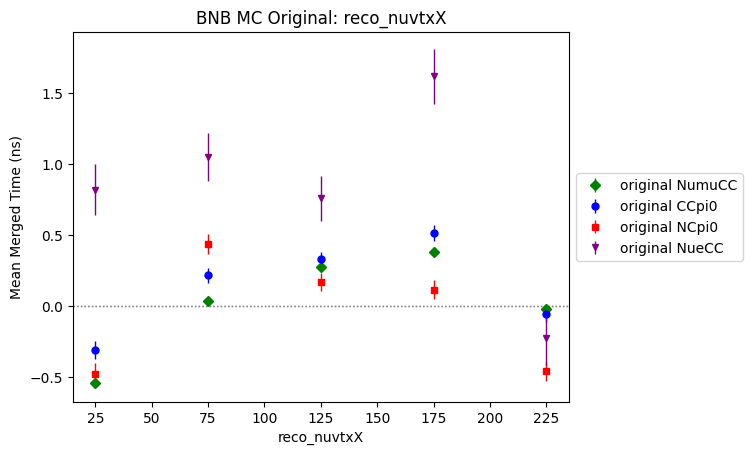

In [125]:
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30)
plt.show()
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30, "orig")
plt.show()

# Truth vs Reco 


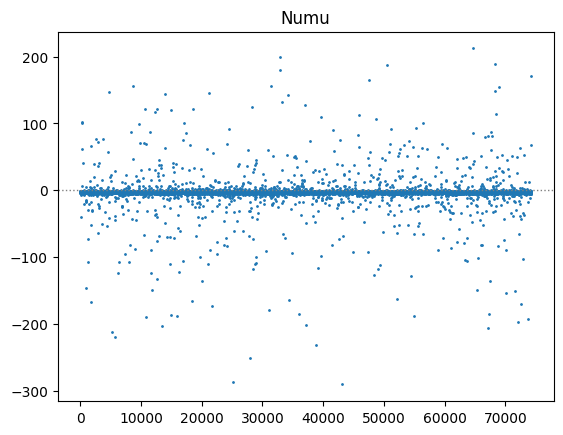

-3.0672228


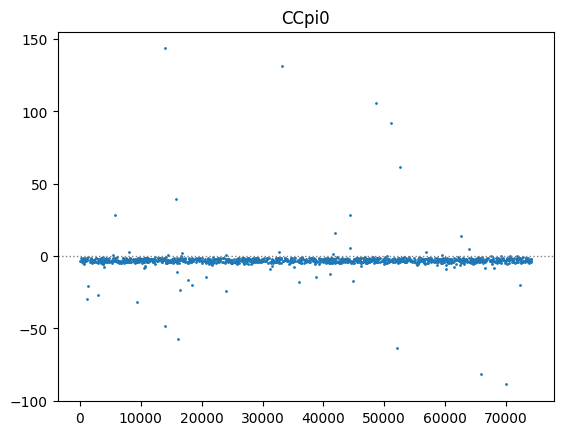

-2.82384


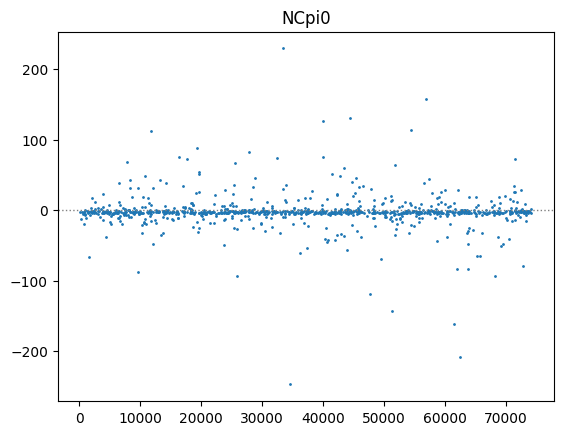

-2.3389268


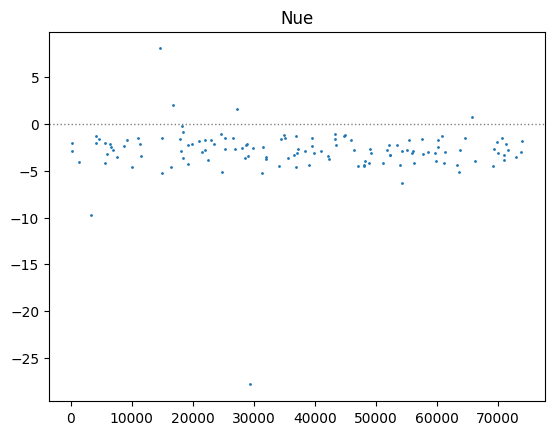

-2.900618


In [126]:
plt.plot(df_bnb_mc.query("numu_score > 0.9")["truth_vtxX"]-df_bnb_mc.query("numu_score > 0.9")["reco_nuvtxX"], marker="o", linestyle = "", markersize=1)
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.title("Numu")
plt.show()
total_diff = (df_bnb_mc.query("numu_score > 0.9")["truth_vtxX"] - df_bnb_mc.query("numu_score > 0.9")["reco_nuvtxX"]).sum()
print(total_diff/len(df_bnb_mc.query("numu_score > 0.9")))

plt.plot(df_bnb_mc.query(CCpi0_query)["truth_vtxX"]-df_bnb_mc.query(CCpi0_query)["reco_nuvtxX"], marker="o", linestyle = "", markersize=1)
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.title("CCpi0")
plt.show()
total_diff = (df_bnb_mc.query(CCpi0_query)["truth_vtxX"] - df_bnb_mc.query(CCpi0_query)["reco_nuvtxX"]).sum()
print(total_diff/len(df_bnb_mc.query(CCpi0_query)))

plt.plot(df_bnb_mc.query(NCpi0_query)["truth_vtxX"]-df_bnb_mc.query(NCpi0_query)["reco_nuvtxX"], marker="o", linestyle = "", markersize=1)
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.title("NCpi0")
plt.show()
total_diff = (df_bnb_mc.query(NCpi0_query)["truth_vtxX"] - df_bnb_mc.query(NCpi0_query)["reco_nuvtxX"]).sum()
print(total_diff/len(df_bnb_mc.query(NCpi0_query)))

plt.plot(df_bnb_mc.query("nue_score>4")["truth_vtxX"]-df_bnb_mc.query("nue_score>4")["reco_nuvtxX"], marker="o", linestyle = "", markersize=1)
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.title("Nue")
plt.show()
total_diff = (df_bnb_mc.query("nue_score>4")["truth_vtxX"] - df_bnb_mc.query("nue_score>4")["reco_nuvtxX"]).sum()
print(total_diff/len(df_bnb_mc.query("nue_score>4")))

